# UK: Household size model

Numerous variables, including age, length of marriage, literacy, preferred number of children, stage of life, etc., affect family size. Having a large family has a variety of drawbacks, including: less money, fewer space, less alone time, someone is constantly fighting, you will get stared at, etc. The size of homes in the UK is the main topic of this research. Less than three people will be considered a small household, and three people or more will be considered a large household. Every model that will be employed will be able to identify factors that affect household size, and the model with the best accuracy will be optimal for forecasting household size in the UK.

In [1]:
#importing the packages 
#for data manipulation
import pandas as pd
import numpy as np
#for visualization 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
%matplotlib inline
# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# Loading the data into dataframe

In [2]:
#loading the data into a dataframe
data=pd.read_csv('Household.csv', encoding='ISO-8859-1')

In [3]:
#displaying the dataframe
data

,sex,age,region,mastat,hushop,hhsize,lstage,nkids,parent,chzerotothree,...,qual,jbstat,jbrgsc,hoh,jbstathoh,fihhyrtwo,us,mghave,intmg,dfihhyr
0,female,29.0,North West,never married,yes,3,single,0,no,no,...,gcse/o-level/cse,unemployed,C2,yes,unemployed,don't know,no,no,not applicable,don't know
1,female,43.0,North West,marrried or couple,no,4,family,2,yes,no,...,a-level or equivalent (=nvq3),in paid employ,B,yes,in paid employ,"£75,000-£99,999",yes,yes,fixed,£700-£799
2,female,53.0,Yorks&Humber,marrried or couple,no,2,post family,0,no,no,...,no formal qualifications,in paid employ,C2,yes,in paid employ,"£25,000-£29,999",yes,yes,fixed,£300-£399
3,female,36.0,South West,marrried or couple,no,4,family,2,yes,yes,...,vocational qualifications (=nvq1+2),in paid employ,C2,yes,in paid employ,"£40,000-£49,999",yes,yes,base rate tracker,£700-£799
4,male,63.0,Wales,marrried or couple,yes,2,post family,0,no,no,...,bachelor degree or equivalent (=nvq4),retired,B,yes,retired,NaN,yes,no,not applicable,don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,female,73.0,Wales,marrried or couple,yes,3,post family,0,no,no,...,no formal qualifications,retired,C2,yes,retired,"£9,500-£11,499",yes,no,not applicable,£700-£799
1981,female,22.0,W Midlands,never married,yes,4,single,0,no,no,...,a-level or equivalent (=nvq3),in paid employ,B,no,in paid employ,don't know,yes,yes,not applicable,£300-£399
1982,female,49.0,Scotland,marrried or couple,no,5+,post family,0,no,no,...,other,in paid employ,C1,yes,in paid employ,NaN,yes,yes,fixed,"£1,200-£1,399"
1983,female,53.0,South East,marrried or couple,no,3,post family,0,no,no,...,bachelor degree or equivalent (=nvq4),in paid employ,B,yes,in paid employ,"£50,000-£74,999",yes,yes,fixed,600-£699


# Basic Checks on the data

In [4]:
#displaying the number of rows and columns of the dataframe
data.shape

(1985, 23)

The dataset has 1985 rows and 23 columns.

In [5]:
#displaying the columns of the dataframe
data.columns

Index(['sex', 'age', 'region', 'mastat', 'hushop', 'hhsize', 'lstage', 'nkids',
       'parent', 'chzerotothree', 'chfourtofive', 'chsixtonine',
       'chtentofifteen', 'qual', 'jbstat', 'jbrgsc', 'hoh', 'jbstathoh',
       'fihhyrtwo', 'us', 'mghave', 'intmg', 'dfihhyr'],
      dtype='object')

# Displaying datatypes in our dataframe

In [6]:
#displaying the datatypes
data.dtypes

sex                object
age               float64
region             object
mastat             object
hushop             object
hhsize             object
lstage             object
nkids              object
parent             object
chzerotothree      object
chfourtofive       object
chsixtonine        object
chtentofifteen     object
qual               object
jbstat             object
jbrgsc             object
hoh                object
jbstathoh          object
fihhyrtwo          object
us                 object
mghave             object
intmg              object
dfihhyr            object
dtype: object

The dataset has one datatype which is a float and others that are object type. These object datatypes are categorical variables.

In [7]:
#displaying the basic information of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             1985 non-null   object 
 1   age             1976 non-null   float64
 2   region          1985 non-null   object 
 3   mastat          1982 non-null   object 
 4   hushop          1985 non-null   object 
 5   hhsize          1981 non-null   object 
 6   lstage          1983 non-null   object 
 7   nkids           1982 non-null   object 
 8   parent          1985 non-null   object 
 9   chzerotothree   1983 non-null   object 
 10  chfourtofive    1983 non-null   object 
 11  chsixtonine     1983 non-null   object 
 12  chtentofifteen  1983 non-null   object 
 13  qual            1985 non-null   object 
 14  jbstat          1985 non-null   object 
 15  jbrgsc          1985 non-null   object 
 16  hoh             1985 non-null   object 
 17  jbstathoh       1985 non-null   o

# Explanatory Data Analysis: EDA

# Insights into the dataset

# Univariate:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'North West'),
  Text(1, 0, 'Yorks&Humber'),
  Text(2, 0, 'South West'),
  Text(3, 0, 'Wales'),
  Text(4, 0, 'South East'),
  Text(5, 0, 'E Midlands'),
  Text(6, 0, 'Scotland'),
  Text(7, 0, 'Greater London'),
  Text(8, 0, 'W Midlands'),
  Text(9, 0, 'North'),
  Text(10, 0, 'E Anglia')])

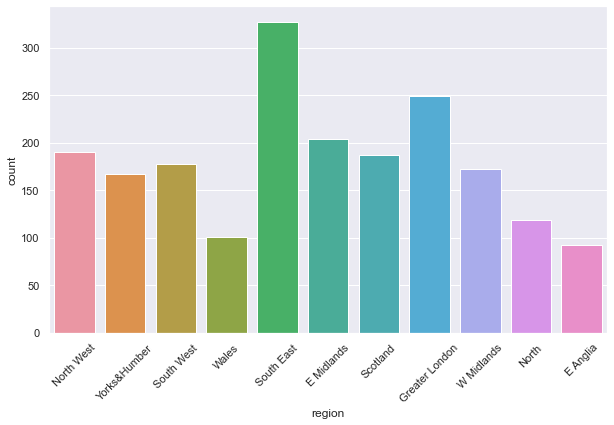

In [8]:
#plotting the figure for regions
plt.figure(figsize=(10,6))
sns.countplot(x="region",data=data)
plt.xticks(rotation=45)

From the diagram above, South East is the region with the highest number of people who took part in this study, followed by the Greater London. East Angilia has the least number of people who took part in this study

(array([0, 1, 2]),
 [Text(0, 0, 'never married'),
  Text(1, 0, 'marrried or couple'),
  Text(2, 0, 'widowed/divorced/separated')])

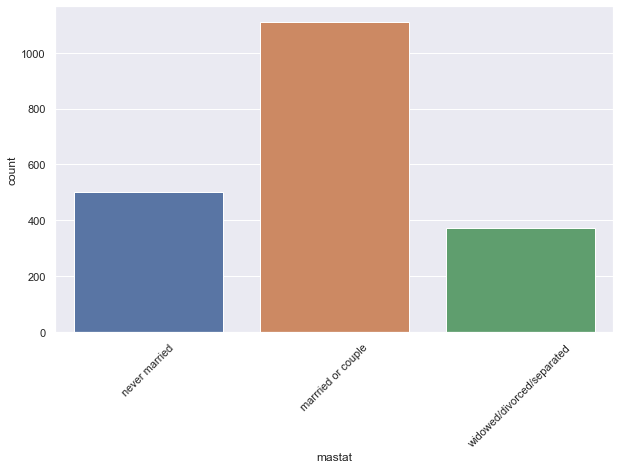

In [9]:
#plotting the figure for marital status of various people
plt.figure(figsize=(10,6))
sns.countplot(x="mastat",data=data)
plt.xticks(rotation=45)

From the illustration above, many people who took part in this study are married or couple followed by never married and those who were either widowed, divorved or separated

(array([0, 1]), [Text(0, 0, 'yes'), Text(1, 0, 'no')])

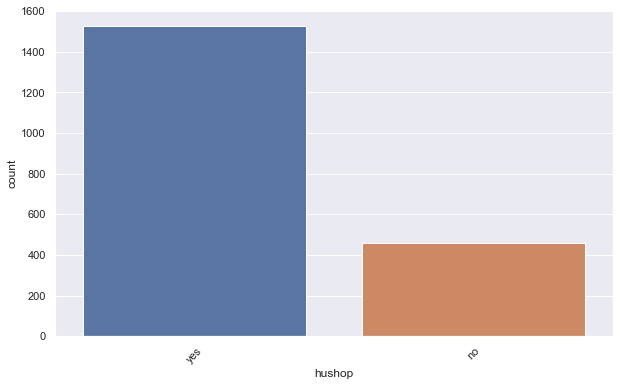

In [10]:
#plotting the figure for hushop 
plt.figure(figsize=(10,6))
sns.countplot(x="hushop",data=data)
plt.xticks(rotation=45)

On the variable hushop, many people said yes and fewer said no. 

(array([0, 1, 2, 3]),
 [Text(0, 0, 'single'),
  Text(1, 0, 'family'),
  Text(2, 0, 'post family'),
  Text(3, 0, 'pre family')])

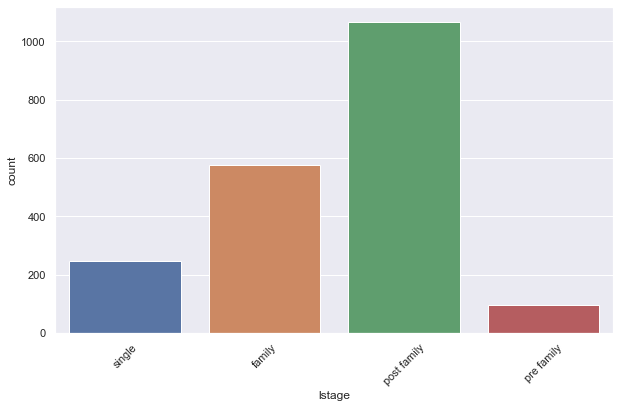

In [11]:
#plotting the fogure for the lifestage of people
plt.figure(figsize=(10,6))
sns.countplot(x="lstage",data=data)
plt.xticks(rotation=45)

Many people in this study are post family, followed by the family. The least is pre family as shown by the diagram above

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

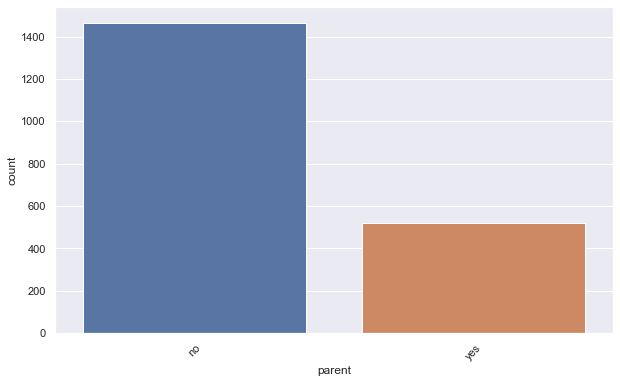

In [12]:
#displaying whether someone is a parent or not
plt.figure(figsize=(10,6))
sns.countplot(x="parent",data=data)
plt.xticks(rotation=45)

From the illustration above, there are fewer people who are parents as compared to those that are not parents

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

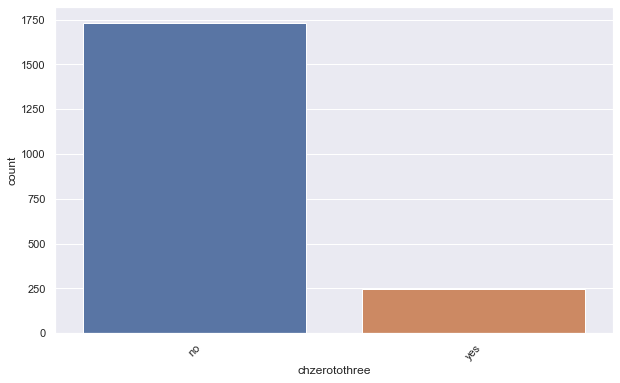

In [13]:
#displaying the channels zero to three listened to by certain individuals
plt.figure(figsize=(10,6))
sns.countplot(x="chzerotothree",data=data)
plt.xticks(rotation=45)

Many people in the UK do not listen to channel zero to three. Very few people listen to these channels as shown on our illustration above.

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

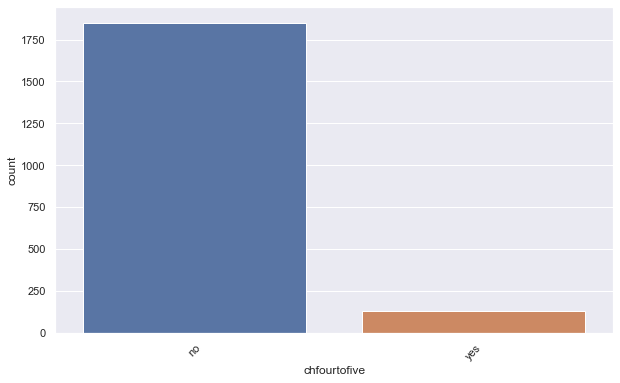

In [14]:
#displaying the channels four to five listened to by certain individuals
plt.figure(figsize=(10,6))
sns.countplot(x="chfourtofive",data=data)
plt.xticks(rotation=45)

On the channels four to five, fewer people listen to them as compared to those who do not listen to them.

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

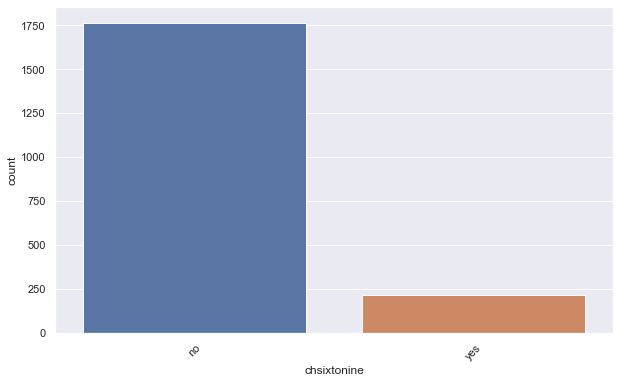

In [15]:
#displaying the channels six to nine that are listened to by certain individuals
plt.figure(figsize=(10,6))
sns.countplot(x="chsixtonine",data=data)
plt.xticks(rotation=45)

For the channels six to nine, again fewer people listen to them as compared to those that do not listen to them.

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

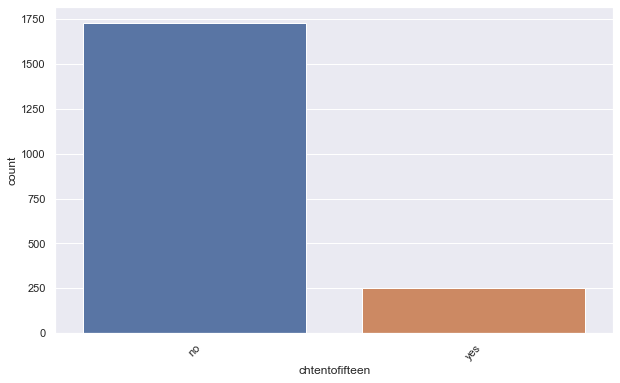

In [16]:
#displaying the channels ten to fifteen that are listened to by certain individuals
plt.figure(figsize=(10,6))
sns.countplot(x="chtentofifteen",data=data)
plt.xticks(rotation=45)

Even on the channels ten to fifteen, many people do not listen to them as compared to those those fewer who listen to them. These illustrations are showing almost the same thing that in the UK fewer people listen to radio channels as compared to those do not listen to them. 

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'gcse/o-level/cse'),
  Text(1, 0, 'a-level or equivalent (=nvq3)'),
  Text(2, 0, 'no formal qualifications'),
  Text(3, 0, 'vocational qualifications (=nvq1+2)'),
  Text(4, 0, 'bachelor degree or equivalent (=nvq4)'),
  Text(5, 0, 'masters/phd or equivalent'),
  Text(6, 0, 'other'),
  Text(7, 0, 'still studying')])

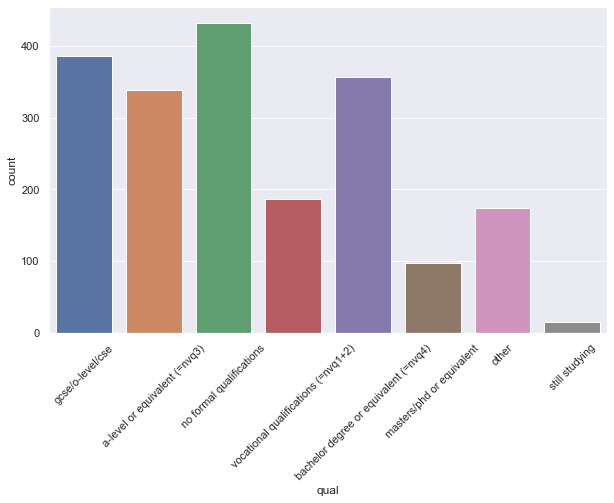

In [17]:
#displaying certain qualification that are possessed by certain individuals 
plt.figure(figsize=(10,6))
sns.countplot(x="qual",data=data)
plt.xticks(rotation=45)

The illustration above, gives us a picture that, many people in the UK do not have a formal qaulification. Again there so many people who are on their gcse/o-level/cse. There more people in the UK who have a vocational qualification more than who have a bachelor's degree and maste's degree. For those who are still studying for their qualifications, they are very few as compared to those who have qualifications already

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'unemployed'),
  Text(1, 0, 'in paid employ'),
  Text(2, 0, 'retired'),
  Text(3, 0, 'long-term sick/disab'),
  Text(4, 0, 'something else'),
  Text(5, 0, 'self employed'),
  Text(6, 0, 'FT student')])

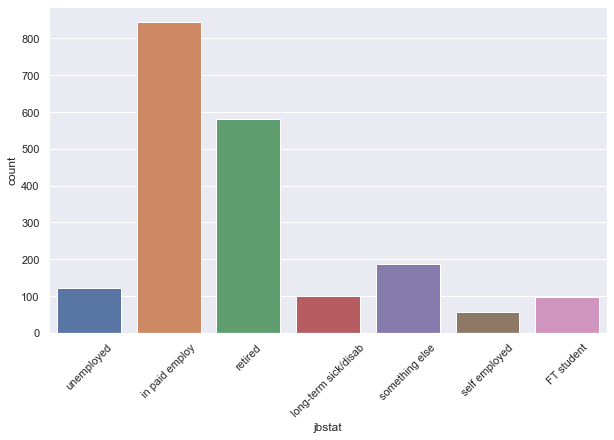

In [18]:
#displaying job status by certain individuals
plt.figure(figsize=(10,6))
sns.countplot(x="jbstat",data=data)
plt.xticks(rotation=45)

Most people in the study group in the UK are in in paid employment, followed by the retired. There is a significant number of people doing something else. Again there are some people who are not employed in the UK. On the other hand there are some people who are on the long term sick leave or disabled. For the self-employed group in the UK, they are the least of people of this group.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'C2'),
  Text(1, 0, 'B'),
  Text(2, 0, 'D'),
  Text(3, 0, 'A'),
  Text(4, 0, 'E'),
  Text(5, 0, 'C1')])

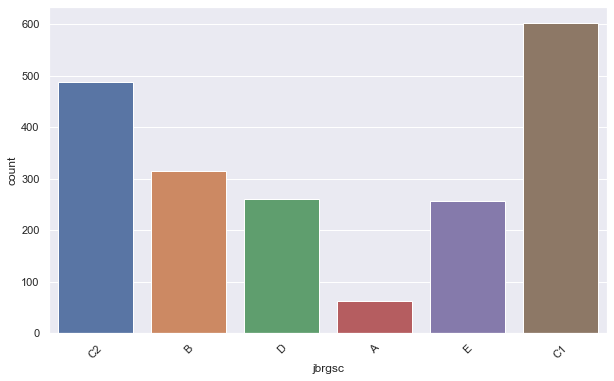

In [19]:
#displaying the job Registrar General's Social Class of certain people
plt.figure(figsize=(10,6))
sns.countplot(x="jbrgsc",data=data)
plt.xticks(rotation=45)

For the jbrgsc, there is a number of people in the c1 followed by c2, then B and so on. The last one with the least number is A.

(array([0, 1]), [Text(0, 0, 'yes'), Text(1, 0, 'no')])

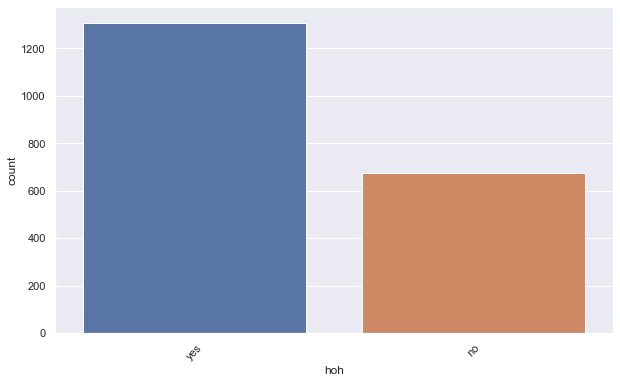

In [20]:
#displaying the head of household (hoh) of certain people whether there are hod or not
plt.figure(figsize=(10,6))
sns.countplot(x="hoh",data=data)
plt.xticks(rotation=45)

For hoh, which is the head of household, many people are head of households as compared to those who are not.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'unemployed'),
  Text(1, 0, 'in paid employ'),
  Text(2, 0, 'retired'),
  Text(3, 0, 'long-term sick/disab'),
  Text(4, 0, 'something else'),
  Text(5, 0, 'self employed'),
  Text(6, 0, 'FT student')])

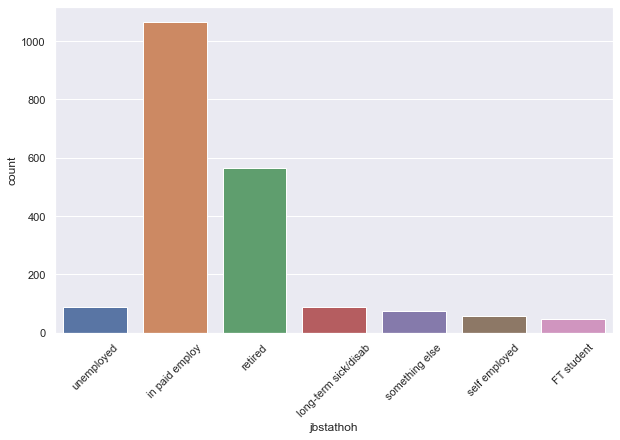

In [21]:
#displaying jobstatus head of household
plt.figure(figsize=(10,6))
sns.countplot(x="jbstathoh",data=data)
plt.xticks(rotation=45)

Most people in the study group in the UK are in in paid employment, followed by the retired. There is a significant number of people doing something else. Again there are some people who are not employed in the UK. On the other hand there are some people who are on the long term sick leave or disabled. For the self-employed group in the UK, they are the least of people of this group.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, "don't know"),
  Text(1, 0, '£75,000-£99,999'),
  Text(2, 0, '£25,000-£29,999'),
  Text(3, 0, '£40,000-£49,999'),
  Text(4, 0, '£7,500-£9,499'),
  Text(5, 0, '£50,000-£74,999'),
  Text(6, 0, 'not applicable'),
  Text(7, 0, '£9,500-£11,499'),
  Text(8, 0, '£6,500-£7,499'),
  Text(9, 0, '£17,500-£24,999'),
  Text(10, 0, '£11,500-£13,499'),
  Text(11, 0, '£30,000-£39,999'),
  Text(12, 0, '£15,500-£17,499'),
  Text(13, 0, '£13,500-£15,499'),
  Text(14, 0, '>=£100,000'),
  Text(15, 0, '<£4,500'),
  Text(16, 0, '£4,500-£6,499')])

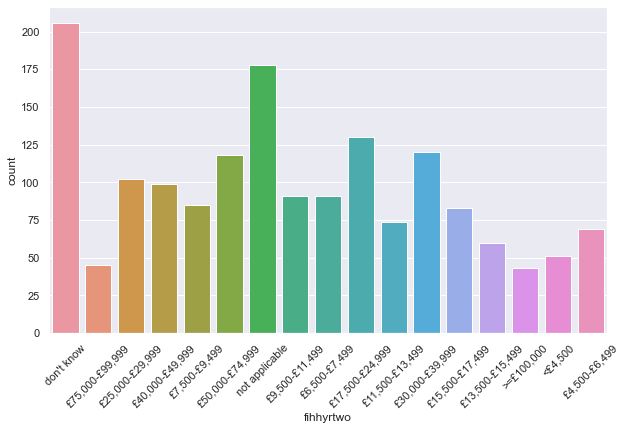

In [22]:
#displaying fihhyrtwo of certain individuals
plt.figure(figsize=(10,6))
sns.countplot(x="fihhyrtwo",data=data)
plt.xticks(rotation=45)

Many people in this group do not know their income, and in not applicable on this study are many. Pertaining to income, those who earn £75 000 t0 £99 999 are very few and many people are in the category £6500 to £7499. The least people are those that earn around £13500 to £15 499.

(array([0, 1, 2]),
 [Text(0, 0, 'no'), Text(1, 0, 'yes'), Text(2, 0, "don't know")])

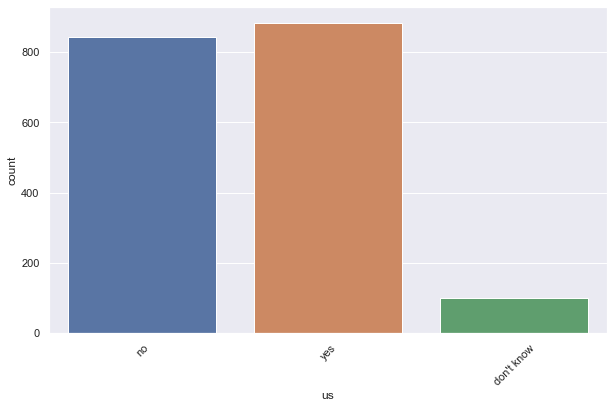

In [23]:
#displayin US of certain individuals
plt.figure(figsize=(10,6))
sns.countplot(x="us",data=data)
plt.xticks(rotation=45)

For the US variable many people many people said YES, followed by NO and then do not know. 

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

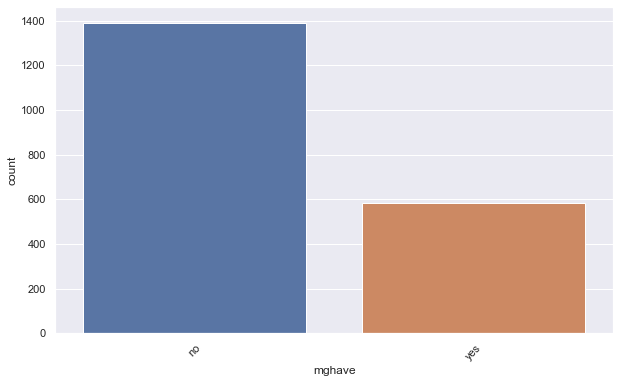

In [24]:
#displaying the mghave in certain people
plt.figure(figsize=(10,6))
sns.countplot(x="mghave",data=data)
plt.xticks(rotation=45)

On the mghave variable, many people said YES as compared to NO.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'not applicable'),
  Text(1, 0, 'fixed'),
  Text(2, 0, 'base rate tracker'),
  Text(3, 0, 'discounted'),
  Text(4, 0, 'variable'),
  Text(5, 0, 'other '),
  Text(6, 0, "don't know"),
  Text(7, 0, 'capped'),
  Text(8, 0, '-10')])

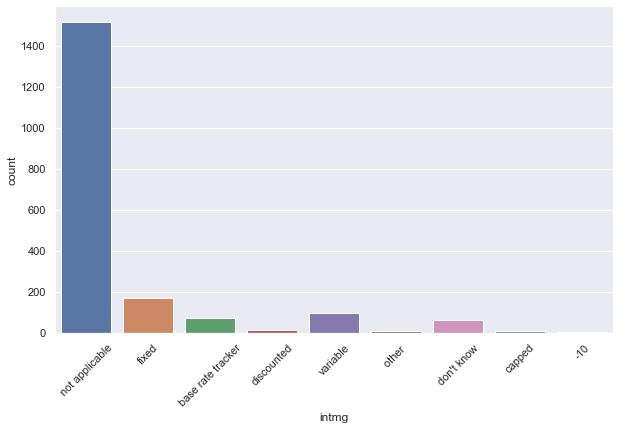

In [25]:
#displaying the intmg of certain individuals
plt.figure(figsize=(10,6))
sns.countplot(x="intmg",data=data)
plt.xticks(rotation=45)

On the intmg has the not applicable has the largest number followed by fixed and variable. The least is -10

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, "don't know"),
  Text(1, 0, '£700-£799'),
  Text(2, 0, '£300-£399'),
  Text(3, 0, '<£200'),
  Text(4, 0, '£400-£499'),
  Text(5, 0, '£500-£599'),
  Text(6, 0, '£200-£299'),
  Text(7, 0, '£2,000-£2,999'),
  Text(8, 0, '£900-£999'),
  Text(9, 0, '£1,200-£1,399'),
  Text(10, 0, '£1,400-£1,599'),
  Text(11, 0, '£800-£899'),
  Text(12, 0, '600-£699'),
  Text(13, 0, '£1,800-£1,999'),
  Text(14, 0, '£1,600-£1,799'),
  Text(15, 0, '>=£5,000'),
  Text(16, 0, '£3,000-£3,999'),
  Text(17, 0, '£4,000-£4,999'),
  Text(18, 0, '£1,000-£1,199')])

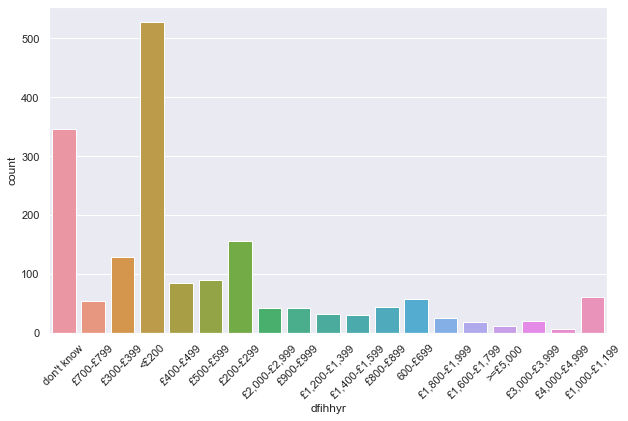

In [26]:
#displaying dfihhyr of certain individuals
plt.figure(figsize=(10,6))
sns.countplot(x="dfihhyr",data=data)
plt.xticks(rotation=45)

For the dfihhyr <£200 has the largest value followed by dont know and the least is between £4000-£4999.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '1'),
  Text(4, 0, '5+'),
  Text(5, 0, '4')])

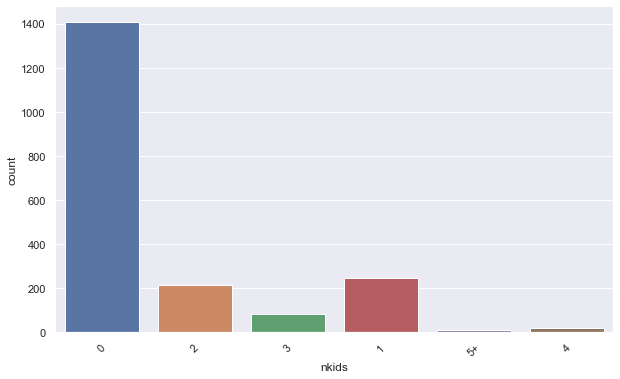

In [27]:
#displaying the number of kids certain individuals have
plt.figure(figsize=(10,6))
sns.countplot(x="nkids",data=data)
plt.xticks(rotation=45)

For the nkids many people in this group dont have children followed by those who have one. Those who have two and more are bot that much. Very few people have five and more children. Generally, in the UK, the people do not have a lot of children.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'single'),
  Text(1, 0, 'family'),
  Text(2, 0, 'post family'),
  Text(3, 0, 'pre family')])

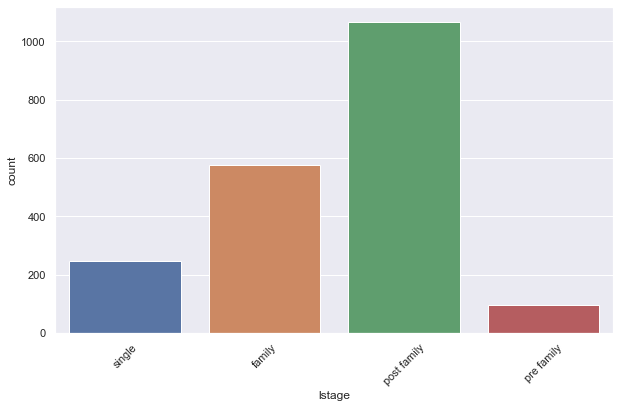

In [28]:
#displaying a certain stage an individual is in 
plt.figure(figsize=(10,6))
sns.countplot(x="lstage",data=data)
plt.xticks(rotation=45)

In the lstage many people are in the post family stage followed by those in the family stage. Single people in the lstage are may again and the least is that category of those in the pre family. From our illustration, many people in the UK is a older generation which is a post family category. 

# Bivariate

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '3'),
  Text(1, 0, '4'),
  Text(2, 0, '2'),
  Text(3, 0, '1'),
  Text(4, 0, '5+')])

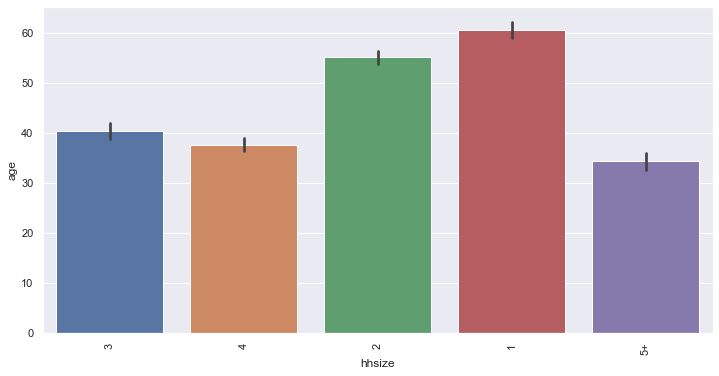

In [29]:
#displaying the number of individuals' age against household size
plt.figure(figsize=(12,6))
sns.barplot(x="hhsize",y="age",data=data)
plt.xticks(rotation=90)

From the illustration above, around years of age have he household size is three and around thirty-eight years of age, the household size is on average of four, at around fiftyfive years of age the household size is two. and at sixty years its around 1. So at fifty five and sixty its post family stage as illustrated before. At around thirty five years many people will be having a household size of five and more, meaning that this is the age were parents and children are living together in the UK and many kids are bone during that period. 

# Displaying frequency of every column in the dataframe

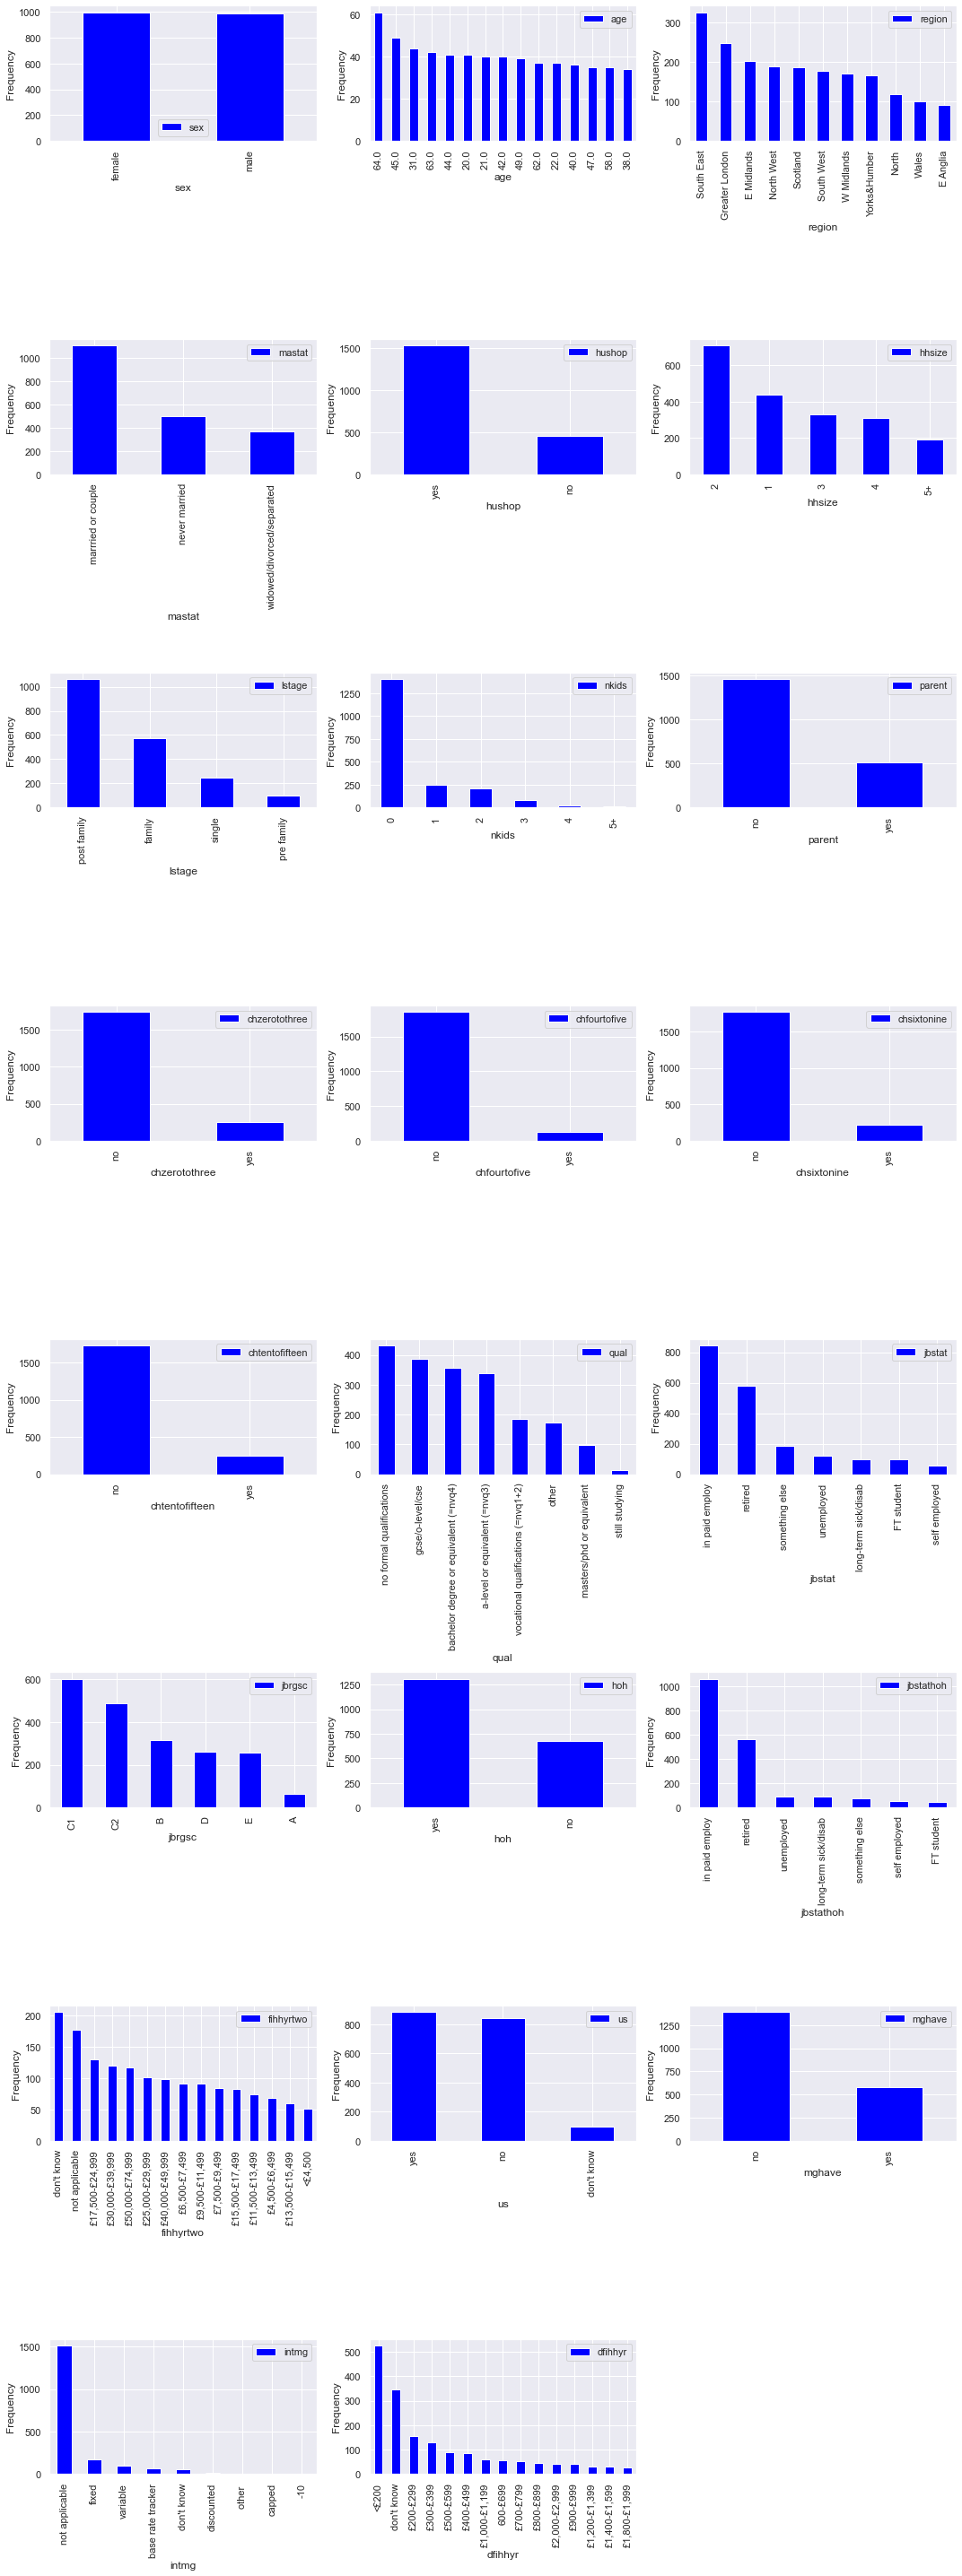

In [30]:
#displaying the frequency of every column in our dataset
fig = plt.figure(figsize=(15,40))
for i in range(len(data.columns)):
 plt.subplot(8, 3, i+1)
 data[data.columns[i]].value_counts().head(15).plot(kind='bar', color="blue")
 plt.xlabel(data.columns[i])
 plt.ylabel("Frequency")
 plt.legend()
 plt.tight_layout()
plt.show()

# Checking for missing values in the dataframe

In [31]:
#finding the missing values in our dataset
data.isnull().sum()

sex                 0
age                 9
region              0
mastat              3
hushop              0
hhsize              4
lstage              2
nkids               3
parent              0
chzerotothree       2
chfourtofive        2
chsixtonine         2
chtentofifteen      2
qual                0
jbstat              0
jbrgsc              0
hoh                 0
jbstathoh           0
fihhyrtwo         340
us                160
mghave             12
intmg              40
dfihhyr           208
dtype: int64

The variables which have a corresponding which is not zero have missing values. Age which is a float has missing values and the other objects which are categorical in nature are has missing values.For the float variable which is age, median is going to be used to fill the missing variable. For the missing variables in the categorical form, simple imputer is going to be used.

# Filling in the missing values of the numerical values with the median

In [32]:
#filling in the missing values in our age variable with the median
data['age'].fillna(data['age'].median(), inplace=True)

# Filling in the missing categorical variables using Simple imputer

In [33]:
#filling in the missing values in the categorical columns using the simpleimputer
from sklearn.impute import SimpleImputer
impute_mode = SimpleImputer(strategy = 'most_frequent')
impute_mode.fit(data[['mastat', 'mghave','hhsize','lstage','nkids','chzerotothree','chfourtofive','chsixtonine','chsixtonine','chtentofifteen','fihhyrtwo','us','intmg','dfihhyr']])

data[['hhsize','lstage','mastat', 'mghave','nkids','chzerotothree','chfourtofive','chsixtonine','chsixtonine','chtentofifteen','fihhyrtwo','us','intmg','dfihhyr']] = impute_mode.transform(data[['hhsize','lstage','mastat', 'mghave','nkids','chzerotothree','chfourtofive','chsixtonine','chsixtonine','chtentofifteen','fihhyrtwo','us','intmg','dfihhyr']])

C:\Users\MuvirimiT\miniconda3\envs\KV7006\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


# Rechecking if there is still missing numerical and categorical variables

In [34]:
#rechecking if there are still missing values in our dataset
data.isnull().sum()

sex               0
age               0
region            0
mastat            0
hushop            0
hhsize            0
lstage            0
nkids             0
parent            0
chzerotothree     0
chfourtofive      0
chsixtonine       0
chtentofifteen    0
qual              0
jbstat            0
jbrgsc            0
hoh               0
jbstathoh         0
fihhyrtwo         0
us                0
mghave            0
intmg             0
dfihhyr           0
dtype: int64

After rechecking for the missing values, no missing values where found.

# Checking for duplicated values

In [35]:
#checking for duplicate values
data.duplicated().sum()

0

No duplicated values are found in our datasets

# Checking for outliers using the age variable

In [36]:
#finding the 75th percentile
percentile75=data['age'].quantile(0.75)

In [37]:
#finding the 25th percentile
percentile25=data['age'].quantile(0.25)

In [38]:
#finding the interquantile range
iqr=percentile75-percentile25

In [39]:
#finding the upper_limit
upper_limit=percentile75+1.5*iqr

In [40]:
#finding the lower_limit
lower_limit=percentile25-1.5*iqr

In [41]:
#printing the upper_limit and the lower_limit
print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)

Upper limit: 110.5
Lower limit: -13.5


In [42]:
#printing the outliers
outliers=data[(data['age']>upper_limit)|(data['age']<lower_limit)]

In [43]:
#displaying the outliers
print("data in 'age':", len(outliers))

data in 'age': 0


# Checking for outliers using a boxplot

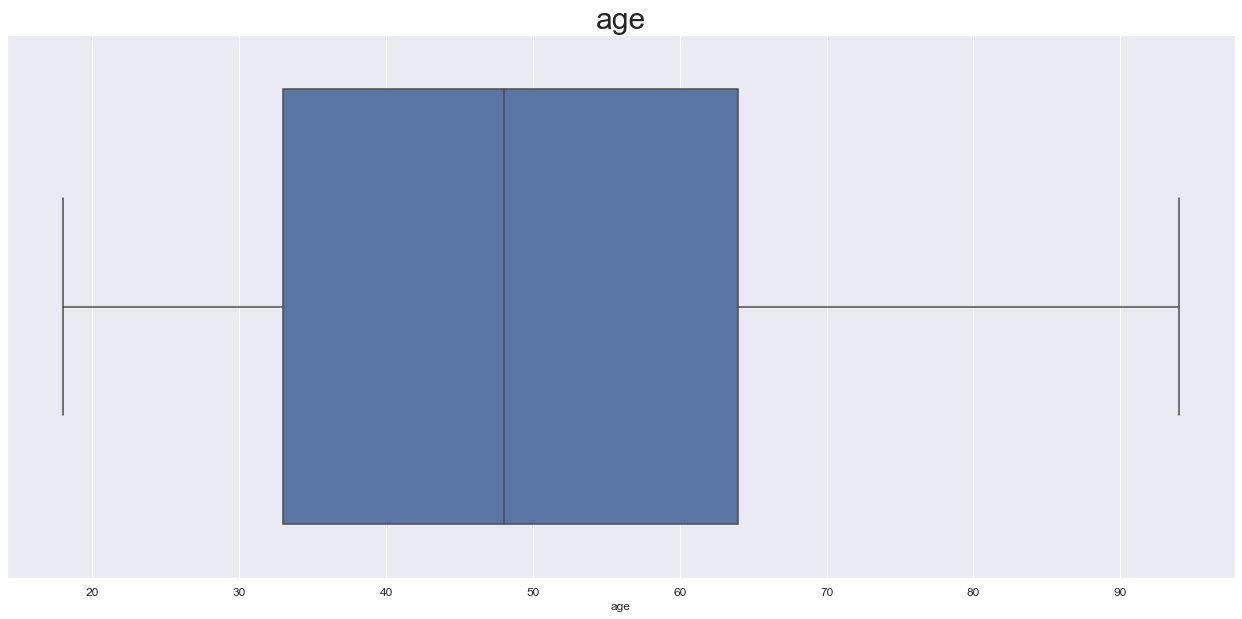

In [44]:
#Checking for outliers using a boxplot
plt.figure(figsize=(22,10))
plt.title('age', fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['age']);

From the boxplots above, we can see that the age variable has no outliers, which supports the code above that produced an outlier of zero. 

# Get the names of all the columns with data type 'object' (categorical columns)

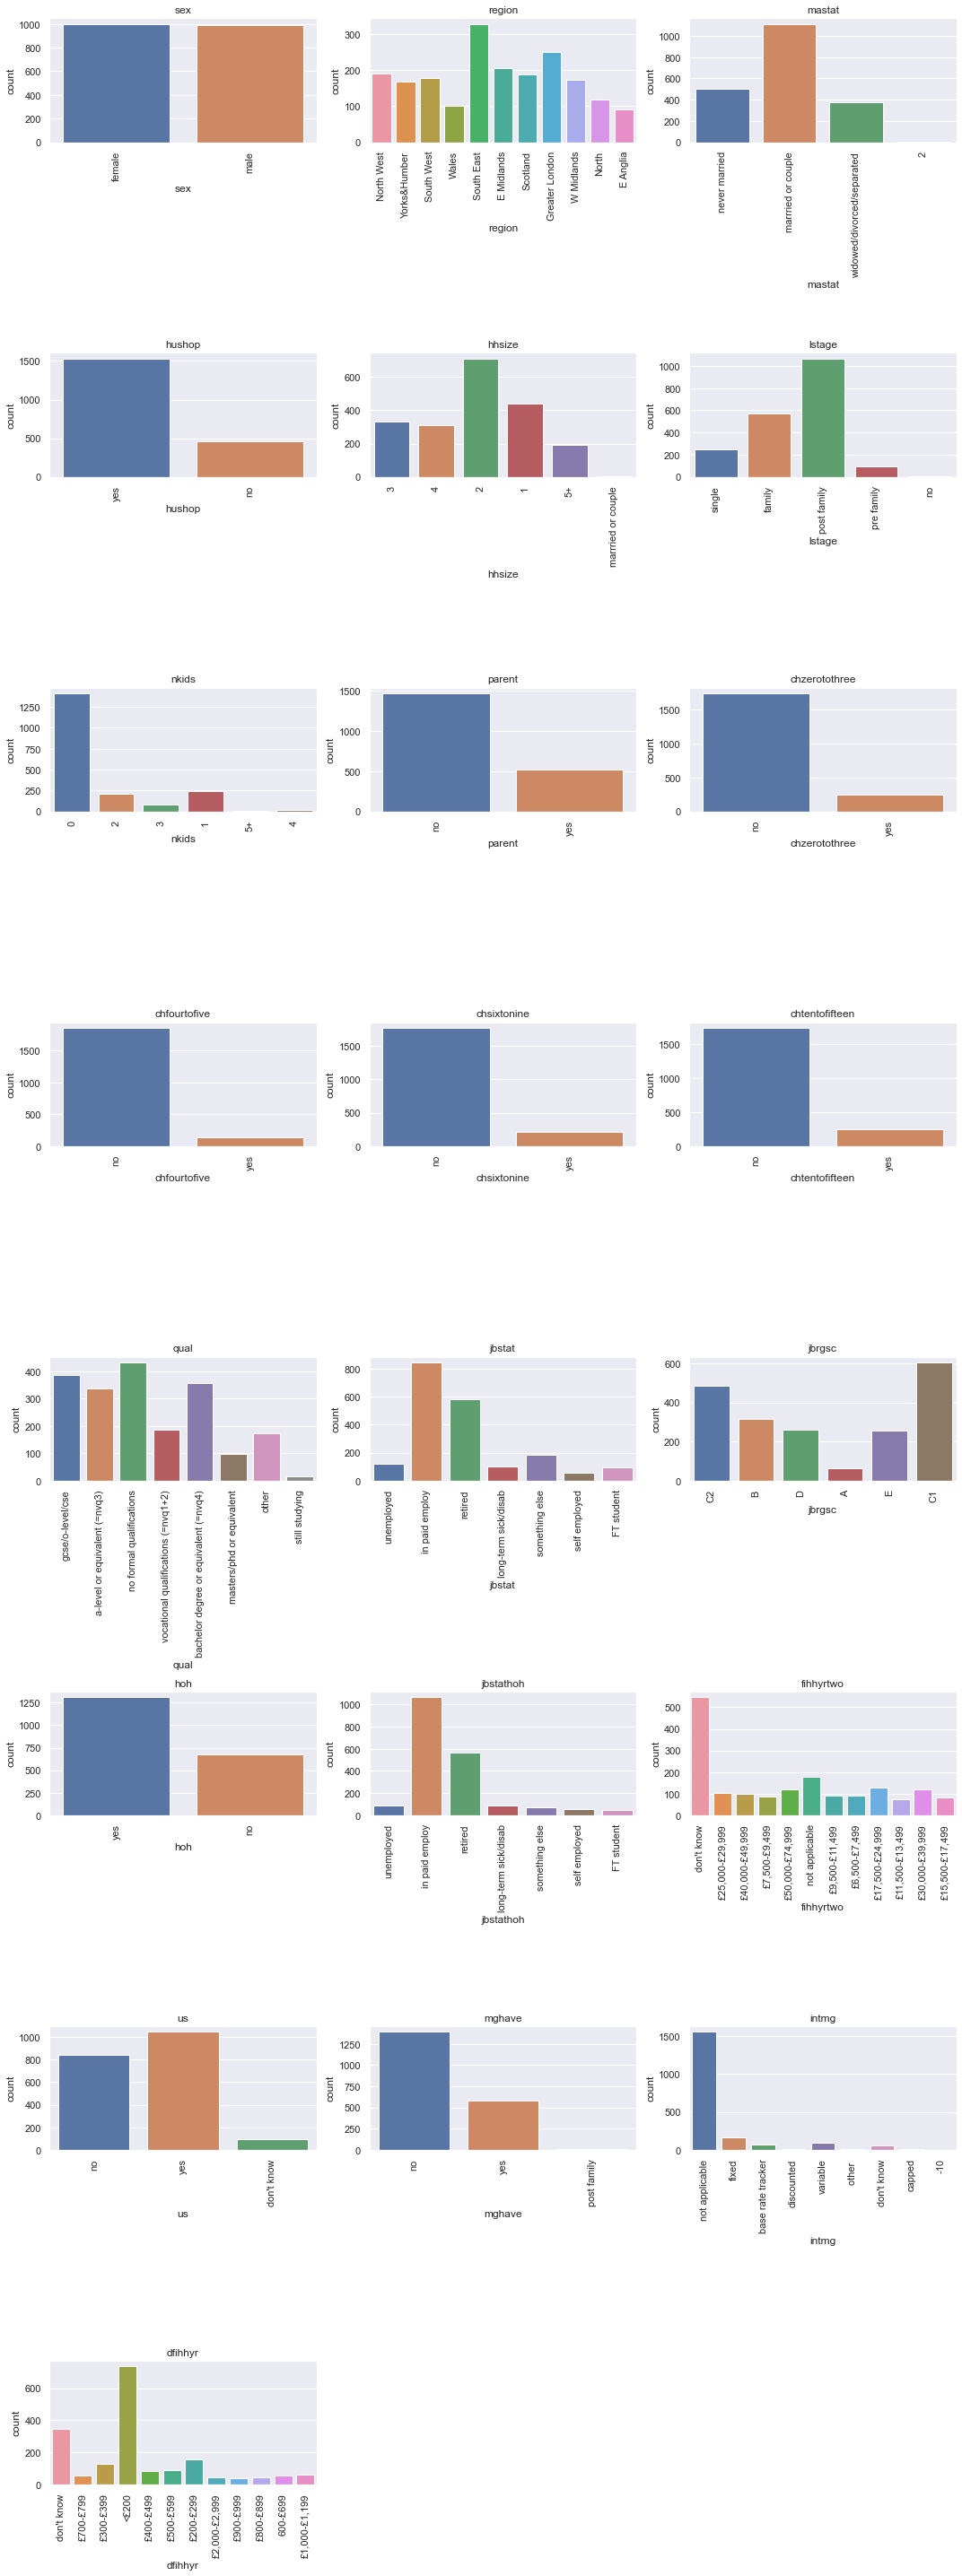

In [45]:
#Get the names of all the columns with data type 'object' (categorical columns)
cat_vars=data.select_dtypes(include='object').columns.tolist()
#Create figure with subplots
num_cols=len(cat_vars)
num_rows=(num_cols+2)//3
fig, axs=plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs=axs.flatten()
#Create counterplot for the top 5 values of each categorical variable
for i, var in enumerate(cat_vars):
    top_values=data[var].value_counts().nlargest(12).index
    filtered_data=data[data[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_data, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)
#Remove any extra subplots if needed
if num_cols<len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
#Adjust spacing between subplots
fig.tight_layout()
#Show plot
plt.show()

# list of the first nine categorical variables to plot

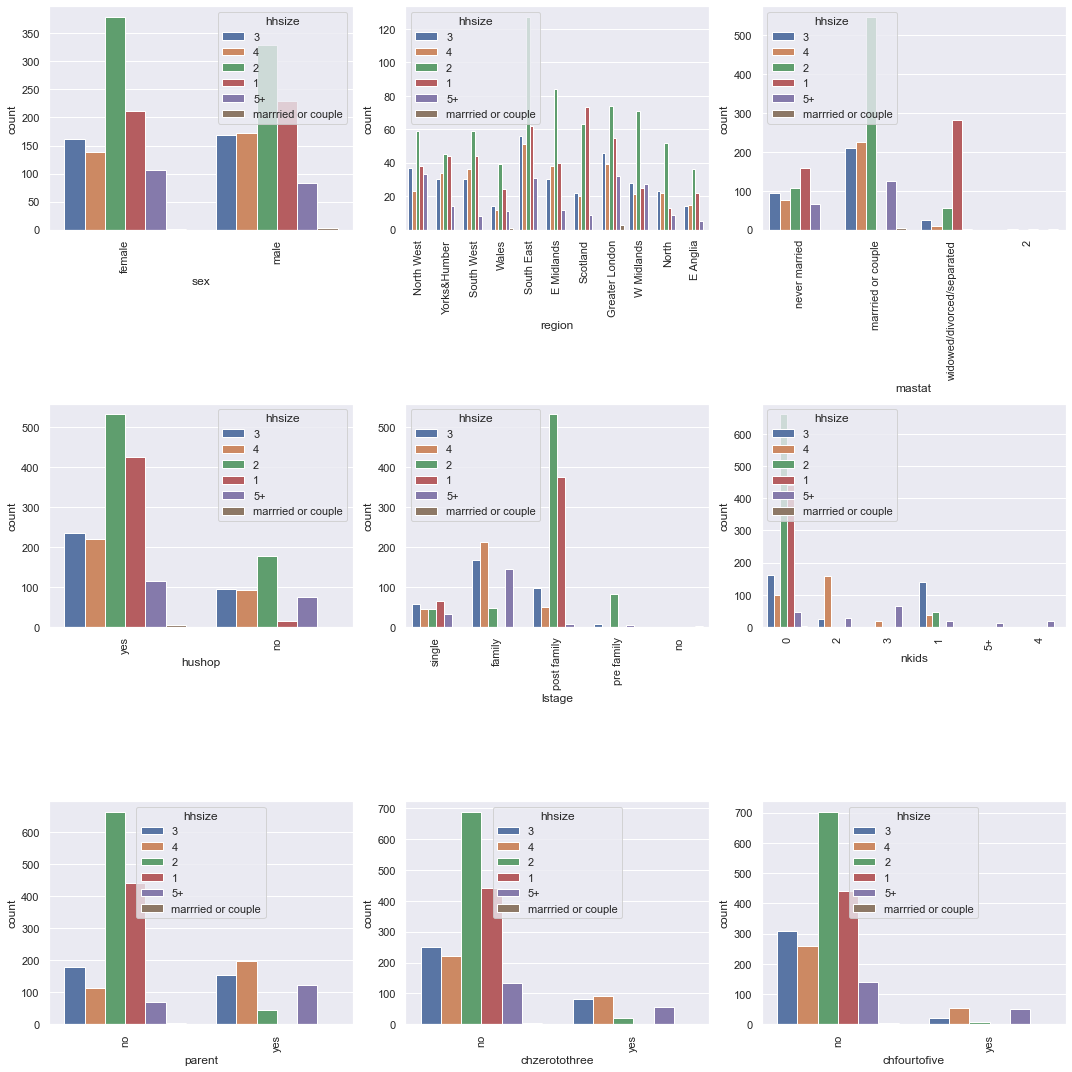

In [46]:
#list of categorical variables to plot
cat_vars=['sex','region','mastat','hushop','lstage','nkids','parent','chzerotothree','chfourtofive']
#create figure with subplots
fig, axs=plt.subplots(nrows=3, ncols=3, figsize=(15,15))
axs=axs.flatten()
#create a barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='hhsize', data=data, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
#adjust spacing between subplots
fig.tight_layout()
#show plot
plt.show()

# list of the second nine categorical variables to plot

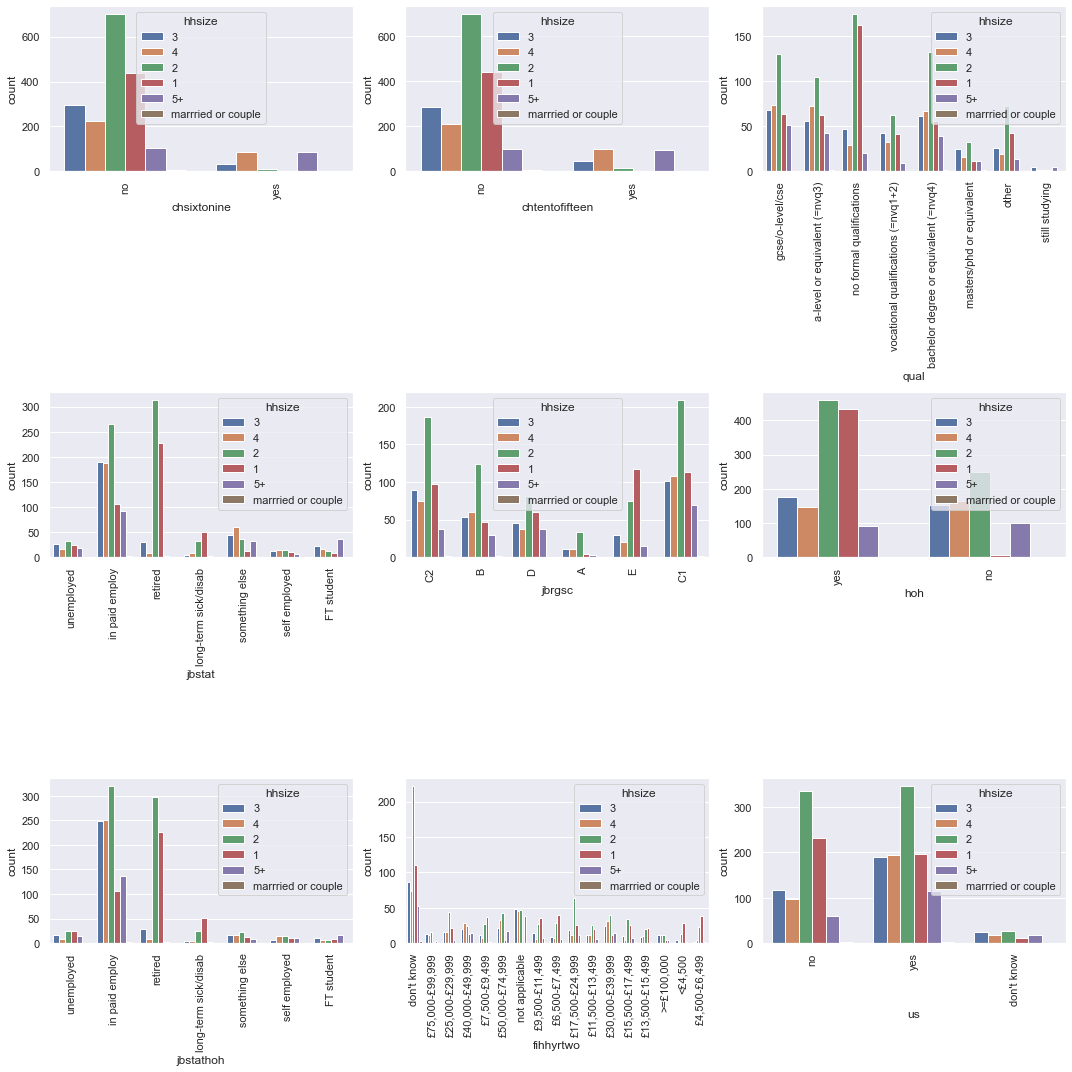

In [47]:
#list of categorical variables to plot
cat_vars=['chsixtonine','chtentofifteen','qual','jbstat','jbrgsc','hoh','jbstathoh','fihhyrtwo','us']
#create figure with subplots
fig, axs=plt.subplots(nrows=3, ncols=3, figsize=(15,15))
axs=axs.flatten()
#create a barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='hhsize', data=data, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
#adjust spacing between subplots
fig.tight_layout()
#show plot
plt.show()

# list of the last three categorical variables to plot

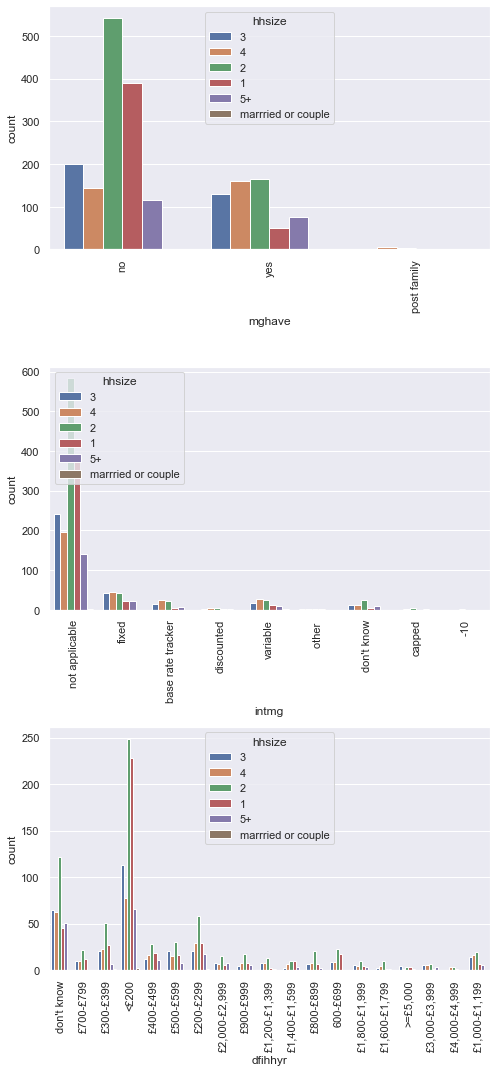

In [48]:
#list of categorical variables to plot
cat_vars=['mghave','intmg','dfihhyr']
#create figure with subplots
fig, axs=plt.subplots(nrows=3, ncols=1, figsize=(7,15))
axs=axs.flatten()
#create a barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='hhsize', data=data, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
#adjust spacing between subplots
fig.tight_layout()
#show plot
plt.show()

# Greating a barplot for the first nine categorical variable

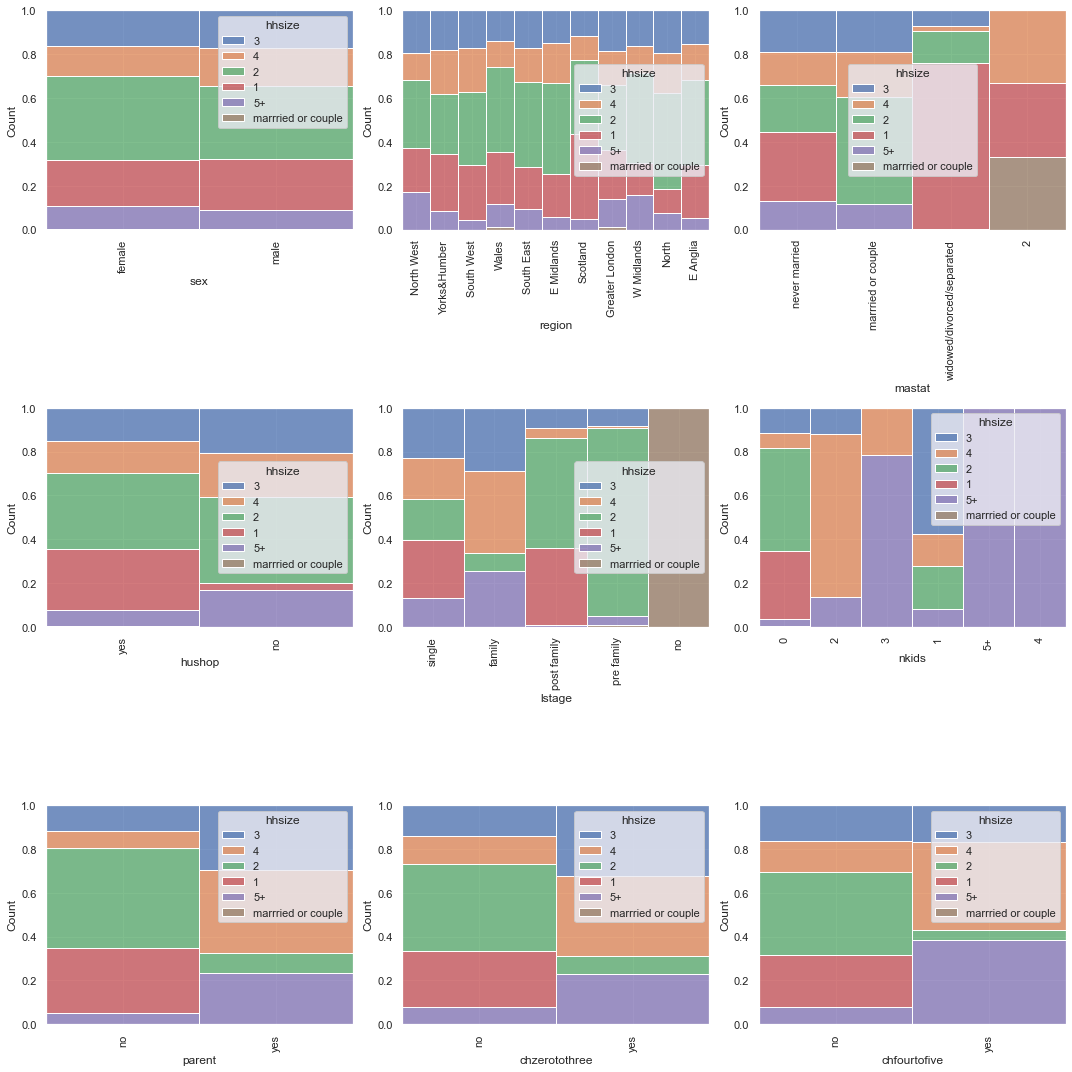

In [49]:
import warnings
warnings.filterwarnings("ignore")
#get list of categorical variables 
cat_vars=['sex','region','mastat','hushop','lstage','nkids','parent','chzerotothree','chfourtofive']
#create figure with subplots
fig, axs=plt.subplots(nrows=3, ncols=3, figsize=(15,15))
axs=axs.flatten()
#create a barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='hhsize', data=data, ax=axs[i], multiple="fill", kde=False)
    axs[i].set_xticklabels(data[var].unique(), rotation=90)
    axs[i].set_xlabel(var)
#adjust spacing between subplots
fig.tight_layout()
#show plot
plt.show()

# Creating a barplot for the second nine categorical variable

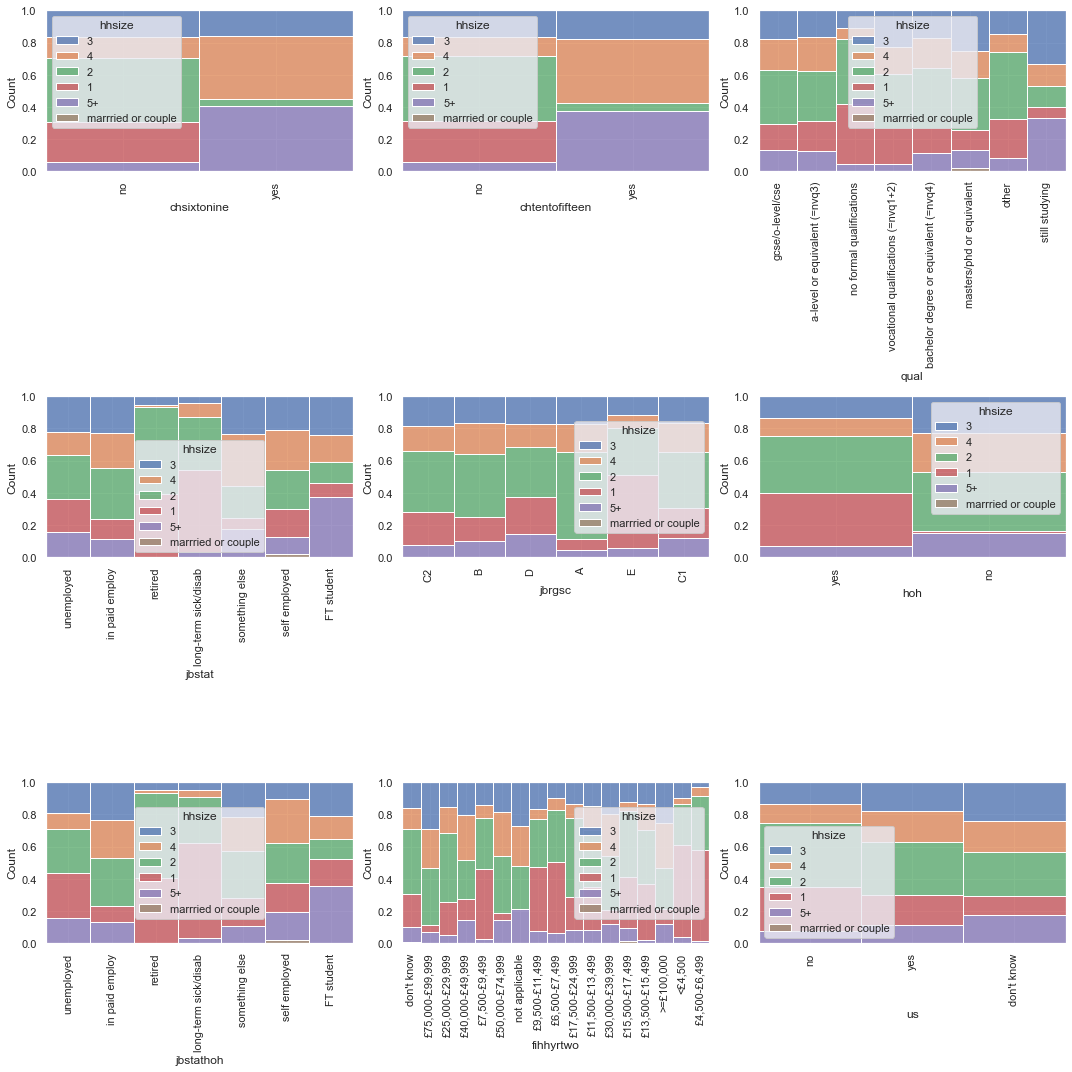

In [50]:
import warnings
warnings.filterwarnings("ignore")
#get list of categorical variables 
cat_vars=['chsixtonine','chtentofifteen','qual','jbstat','jbrgsc','hoh','jbstathoh','fihhyrtwo','us']
#create figure with subplots
fig, axs=plt.subplots(nrows=3, ncols=3, figsize=(15,15))
axs=axs.flatten()
#create a barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='hhsize', data=data, ax=axs[i], multiple="fill", kde=False)
    axs[i].set_xticklabels(data[var].unique(), rotation=90)
    axs[i].set_xlabel(var)
#adjust spacing between subplots
fig.tight_layout()
#show plot
plt.show()

# Creating a barplot for each of the last three categorical variables

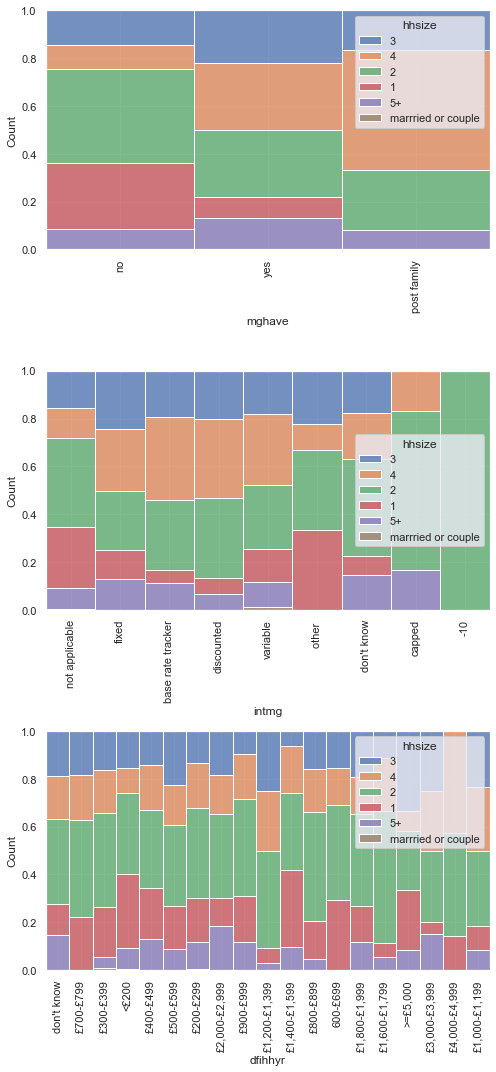

In [51]:
import warnings
warnings.filterwarnings("ignore")
#get list of categorical variables 
cat_vars=['mghave','intmg','dfihhyr']
#create figure with subplots
fig, axs=plt.subplots(nrows=3, ncols=1, figsize=(7,15))
axs=axs.flatten()
#create a barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='hhsize', data=data, ax=axs[i], multiple="fill", kde=False)
    axs[i].set_xticklabels(data[var].unique(), rotation=90)
    axs[i].set_xlabel(var)
#adjust spacing between subplots
fig.tight_layout()
#show plot
plt.show()

In [52]:
#displaying the contents of all the categorical variables
for col in data.select_dtypes(include=['object']).columns:
    print(f"{col}:{data[col].unique}")

sex:<bound method Series.unique of 0       female
1       female
2       female
3       female
4         male
         ...  
1980    female
1981    female
1982    female
1983    female
1984      male
Name: sex, Length: 1985, dtype: object>
region:<bound method Series.unique of 0         North West
1         North West
2       Yorks&Humber
3         South West
4              Wales
            ...     
1980           Wales
1981      W Midlands
1982        Scotland
1983      South East
1984      E Midlands
Name: region, Length: 1985, dtype: object>
mastat:<bound method Series.unique of 0            never married
1       marrried or couple
2       marrried or couple
3       marrried or couple
4       marrried or couple
               ...        
1980    marrried or couple
1981         never married
1982    marrried or couple
1983    marrried or couple
1984         never married
Name: mastat, Length: 1985, dtype: object>
hushop:<bound method Series.unique of 0       yes
1        no
2       

# Transformation of the categorical variables into numeriacal variables using LabelEncoder

In [53]:
#transforming the categorical variables to numerical values using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [54]:
#transforming the categorical variables to numerical variables
data.sex=le.fit_transform(data.sex)
data.region=le.fit_transform(data.region)
data.mastat=le.fit_transform(data.mastat)
data.hushop=le.fit_transform(data.hushop)
data.hhsize=le.fit_transform(data.hhsize)
data.lstage=le.fit_transform(data.lstage)
data.parent=le.fit_transform(data.parent)
data.nkids=le.fit_transform(data.nkids)
data.chzerotothree=le.fit_transform(data.chzerotothree)
data.chfourtofive=le.fit_transform(data.chfourtofive)
data.chsixtonine=le.fit_transform(data.chsixtonine)
data.chtentofifteen=le.fit_transform(data.chtentofifteen)
data.qual=le.fit_transform(data.qual)
data.jbrgsc=le.fit_transform(data.jbrgsc)
data.hoh=le.fit_transform(data.hoh)
data.jbstathoh=le.fit_transform(data.jbstathoh)
data.fihhyrtwo=le.fit_transform(data.fihhyrtwo)
data.us=le.fit_transform(data.us)
data.mghave=le.fit_transform(data.mghave)
data.intmg=le.fit_transform(data.intmg)
data.dfihhyr=le.fit_transform(data.dfihhyr)
data.jbstat=le.fit_transform(data.jbstat)

In [55]:
#checking in the data if there is are still categorical values
data

,sex,age,region,mastat,hushop,hhsize,lstage,nkids,parent,chzerotothree,...,qual,jbstat,jbrgsc,hoh,jbstathoh,fihhyrtwo,us,mghave,intmg,dfihhyr
0,0,29.0,4,2,1,2,4,0,0,0,...,2,6,3,1,6,2,1,0,6,3
1,0,43.0,4,1,0,3,0,2,1,0,...,0,1,1,1,1,15,2,2,5,16
2,0,53.0,10,1,0,1,2,0,0,0,...,4,1,3,1,1,8,2,2,5,12
3,0,36.0,7,1,0,3,0,2,1,1,...,7,1,3,1,1,11,2,2,1,16
4,1,63.0,9,1,1,1,2,0,0,0,...,1,3,1,1,3,2,2,0,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,0,73.0,9,1,1,2,2,0,0,0,...,4,3,3,1,3,16,2,0,6,16
1981,0,22.0,8,2,1,3,4,0,0,0,...,0,1,1,0,1,2,2,2,6,12
1982,0,49.0,5,1,0,4,2,0,0,0,...,5,1,2,1,1,2,2,2,5,5
1983,0,53.0,6,1,0,2,2,0,0,0,...,1,1,1,1,1,12,2,2,5,0


# setting the threshhold on our dependent variable hhsize <3=0 and >3=1

In [56]:
#setting the threshhold on our dependend variable hhsize <3=0 and >3=1
data.loc[data['hhsize']<3,'hhsize']=0
data.loc[data['hhsize']>=3,'hhsize']=1

In [57]:
#checking if our dependent variable have changed 0,1 thus changing the regression problem to classification problem
data

,sex,age,region,mastat,hushop,hhsize,lstage,nkids,parent,chzerotothree,...,qual,jbstat,jbrgsc,hoh,jbstathoh,fihhyrtwo,us,mghave,intmg,dfihhyr
0,0,29.0,4,2,1,0,4,0,0,0,...,2,6,3,1,6,2,1,0,6,3
1,0,43.0,4,1,0,1,0,2,1,0,...,0,1,1,1,1,15,2,2,5,16
2,0,53.0,10,1,0,0,2,0,0,0,...,4,1,3,1,1,8,2,2,5,12
3,0,36.0,7,1,0,1,0,2,1,1,...,7,1,3,1,1,11,2,2,1,16
4,1,63.0,9,1,1,0,2,0,0,0,...,1,3,1,1,3,2,2,0,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,0,73.0,9,1,1,0,2,0,0,0,...,4,3,3,1,3,16,2,0,6,16
1981,0,22.0,8,2,1,1,4,0,0,0,...,0,1,1,0,1,2,2,2,6,12
1982,0,49.0,5,1,0,1,2,0,0,0,...,5,1,2,1,1,2,2,2,5,5
1983,0,53.0,6,1,0,0,2,0,0,0,...,1,1,1,1,1,12,2,2,5,0


# Plotting of the heatmap of the dataframe

<AxesSubplot:>

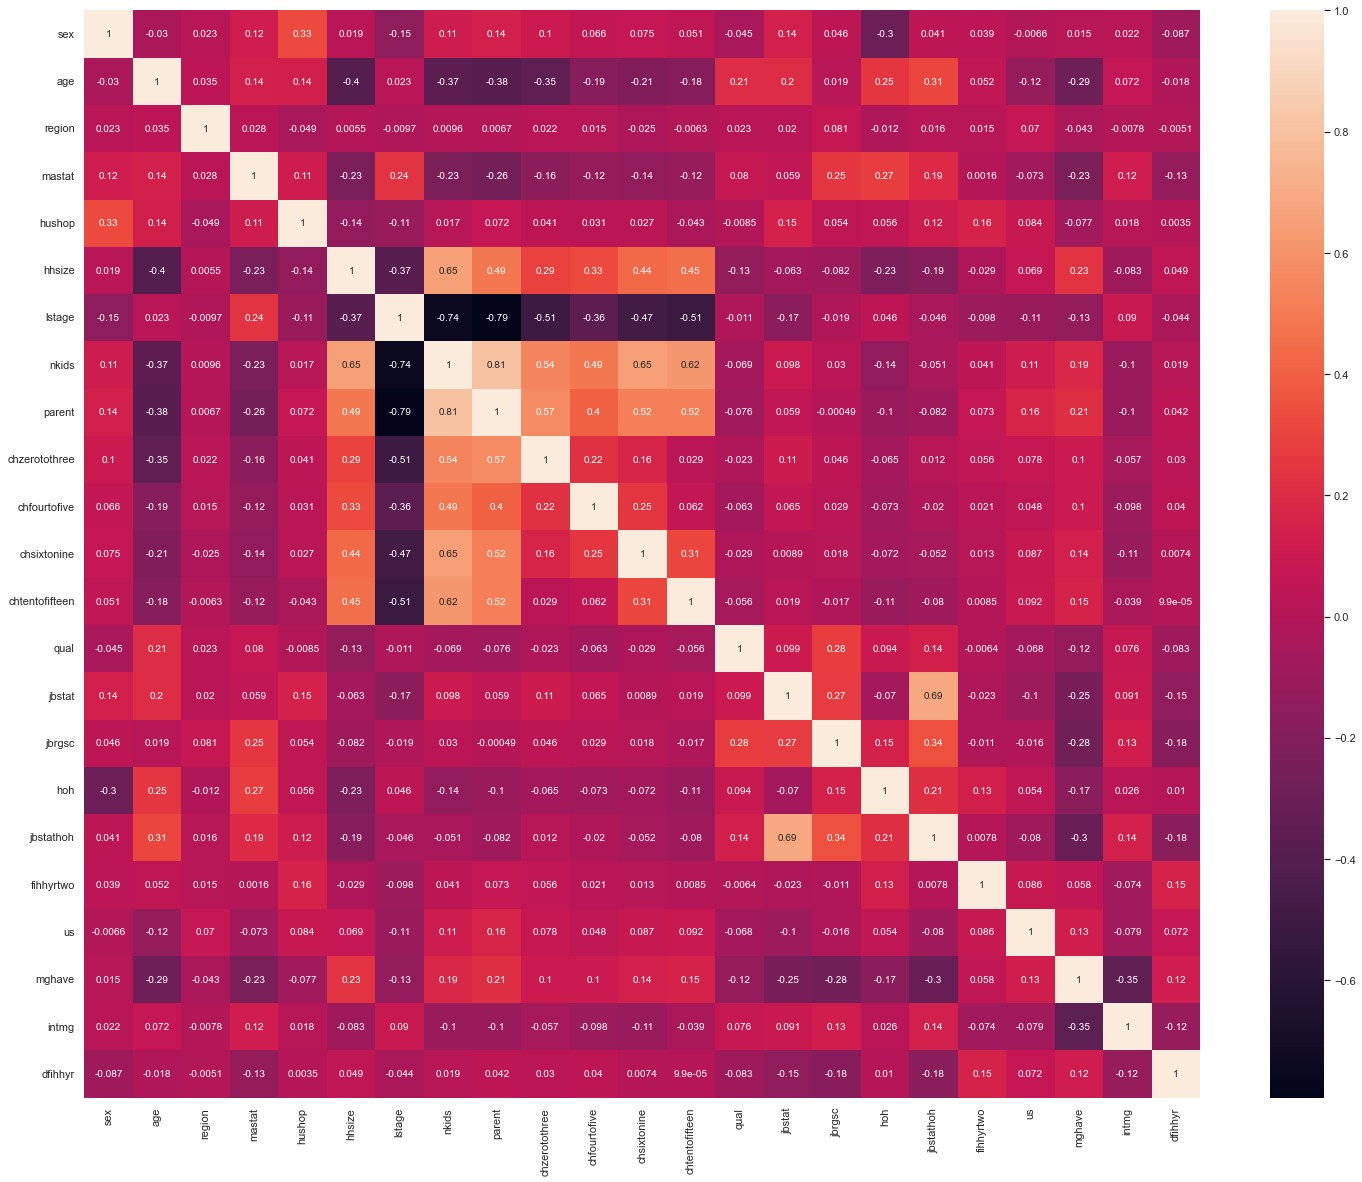

In [58]:
#plotting the heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(data.corr(), fmt='.2g', annot=True)

# Isolating the outcome variable

In [59]:
#selecting the dependent variable
y=data['hhsize']

In [60]:
#displaying the five rows of our dependent variable
y.head()

0    0
1    1
2    0
3    1
4    0
Name: hhsize, dtype: int32

# Selecting the fetaures

In [61]:
#selecting independent variable x by dropping the dependent variable
x=data.drop('hhsize', axis=1)

In [62]:
#displaying the first five rows of our independent variable
x.head()

,sex,age,region,mastat,hushop,lstage,nkids,parent,chzerotothree,chfourtofive,...,qual,jbstat,jbrgsc,hoh,jbstathoh,fihhyrtwo,us,mghave,intmg,dfihhyr
0,0,29.0,4,2,1,4,0,0,0,0,...,2,6,3,1,6,2,1,0,6,3
1,0,43.0,4,1,0,0,2,1,0,0,...,0,1,1,1,1,15,2,2,5,16
2,0,53.0,10,1,0,2,0,0,0,0,...,4,1,3,1,1,8,2,2,5,12
3,0,36.0,7,1,0,0,2,1,1,0,...,7,1,3,1,1,11,2,2,1,16
4,1,63.0,9,1,1,2,0,0,0,0,...,1,3,1,1,3,2,2,0,6,3


# Modelling Approach A: Naive Bayes Classifier

# Importing of the packages for Naive Bayes Classifier, Decision Tree and Random forest.

In [63]:
#importing of the packages
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas_profiling

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# figure size in inches
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

In [64]:
#scaling the datasets 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [65]:
# split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, stratify=y, test_size=0.10, random_state=42)

# Modelling Approach A: Using Naive Bayes Classifier

In [66]:
#Creating the classifier
model = GaussianNB()
model.fit(x_train, y_train);

In [67]:
#importing the metrics 
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)
#setting the y_pred
y_pred = model.predict(x_test)
#setting and printing the accuracy
accuracy = accuracy_score(y_pred, y_test)
precision=precision_score(y_pred, y_test,average="weighted")
recall=recall_score(y_pred, y_test, average="weighted")
f1 = f1_score(y_pred, y_test, average="weighted")

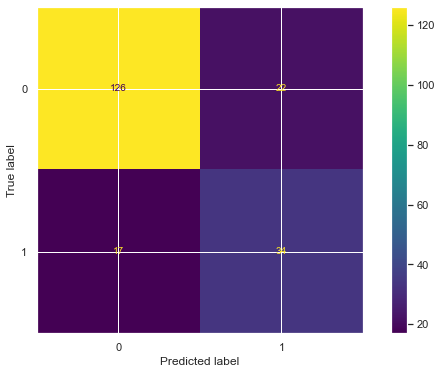

In [68]:
#Computing values for confusion matrix
NaiveBayes_cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Creating a display of confusion matrix
NaiveBayes_disp = ConfusionMatrixDisplay(confusion_matrix=NaiveBayes_cm, 
                                  display_labels=model.classes_)

# Plotting a confusion matrix
NaiveBayes_disp.plot(values_format='')

# Displaying a plot
plt.show()

In [69]:
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8040201005025126
F1 Score: 0.8011248070006066
Precision: 0.7993797817918421
Recall: 0.8040201005025126


# Feature importance of Naive Bayes Classifier:

In [70]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit a Gaussian Naive Bayes model
model = GaussianNB()
model.fit(x_train, y_train)

# Calculate the permutation importance
perm_importance = permutation_importance(model, x_test, y_test, n_repeats=30, random_state=42)

# Print the results
for i in range(len(x_test.columns)):
    print(f"Feature {x_test.columns[i]} importance: {perm_importance.importances_mean[i]}")

Feature sex importance: 0.0
Feature age importance: -0.005541561712846299
Feature region importance: 0.0
Feature mastat importance: -0.0009235936188076832
Feature hushop importance: 0.0010075566750630187
Feature lstage importance: 0.003862300587741452
Feature nkids importance: 0.049958018471872416
Feature parent importance: -0.00193115029387065
Feature chzerotothree importance: -0.018807724601175427
Feature chfourtofive importance: 0.02762384550797653
Feature chsixtonine importance: 0.02712006717044504
Feature chtentofifteen importance: 0.03064651553316544
Feature qual importance: 0.0003358522250210346
Feature jbstat importance: -0.0010075566750629595
Feature jbrgsc importance: 2.590520390792032e-17
Feature hoh importance: -0.0011754827875734306
Feature jbstathoh importance: 0.00025188916876577315
Feature fihhyrtwo importance: -8.396305625524662e-05
Feature us importance: -0.0010075566750629595
Feature mghave importance: -0.002938706968933628
Feature intmg importance: -0.00319059613769

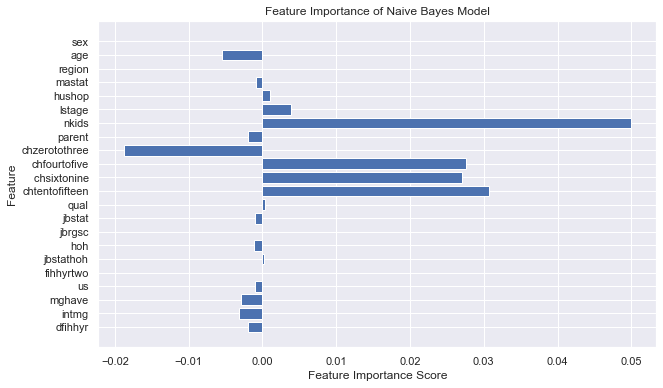

In [71]:
# Feature selection or ranking code (use your chosen method)
selected_features = ["sex", "age", "region", "mastat","hushop", "lstage","nkids","parent","chzerotothree","chfourtofive",
                     " chsixtonine","chtentofifteen","qual","jbstat","jbrgsc","hoh","jbstathoh","fihhyrtwo","us","mghave",
                     "intmg","dfihhyr"]
feature_importance_scores = [0.0, -0.005541561712846299, 0.0,-0.0009235936188076832, 0.0010075566750630187,0.003862300587741452,
                            0.049958018471872416,-0.00193115029387065,-0.018807724601175427, 0.02762384550797653,0.02712006717044504,
                            0.03064651553316544,0.0003358522250210346,-0.0010075566750629595,2.590520390792032e-17,-0.0011754827875734306,
                            0.00025188916876577315,-8.396305625524662e-05,-0.0010075566750629595,-0.002938706968933628,-0.003190596137699364,
                            -0.0019311502938706723]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(selected_features, feature_importance_scores)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance of Naive Bayes Model")
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()

# The Roc Curve of Naive Bayes Classifier

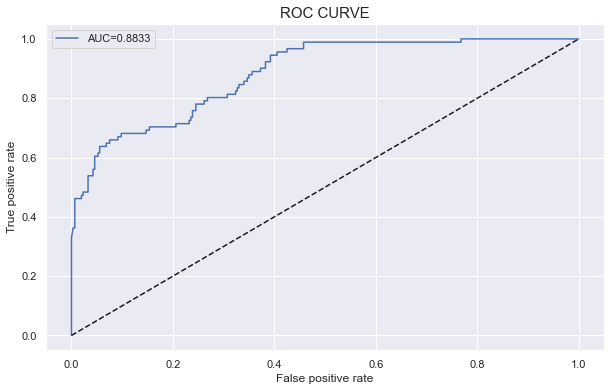

In [72]:
y_pred_proba = model.predict_proba(x_test)[:, 1]

data_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']),
                                   pd.DataFrame(y_pred_proba, columns=['y_predicted'])],
                                  axis=1)

fpr, tpr, thresholds = roc_curve(data_actual_predicted['y_actual'], data_actual_predicted['y_predicted'])
auc = roc_auc_score(data_actual_predicted['y_actual'], data_actual_predicted['y_predicted'])

plt.plot(fpr, tpr, label='AUC=%0.4f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC CURVE', size=15)
plt.legend()
plt.show()

# Decision Tree: Standard form

In [73]:
#importing the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [74]:
# create the classifier
DecisionTree = DecisionTreeClassifier(random_state=100)

# Train the model using the training sets
DecisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=100)

In [75]:
# predictin on the test set
y_pred = DecisionTree.predict(x_test)

In [76]:
# Calculate Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8161209068010076


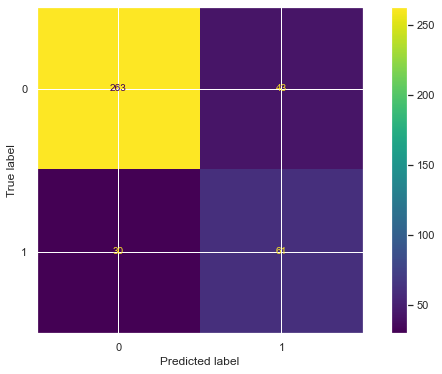

In [77]:
 #Computing values for confusion matrix
DecisionTree_cm= confusion_matrix(y_test, y_pred, labels=DecisionTree.classes_)

# Creating a display of confusion matrix
DecisionTree_disp = ConfusionMatrixDisplay(confusion_matrix=DecisionTree_cm, 
                                  display_labels=DecisionTree.classes_)

# Plotting a confusion matrix
DecisionTree_disp.plot(values_format='')

# Displaying a plot
plt.show()

In [78]:
#printing the classification report
target_names = ['Predicted as small household', 'Predicted as big household']
print(classification_report(y_test, y_pred, target_names=target_names))

                              precision    recall  f1-score   support

Predicted as small household       0.90      0.86      0.88       306
  Predicted as big household       0.59      0.67      0.63        91

                    accuracy                           0.82       397
                   macro avg       0.74      0.76      0.75       397
                weighted avg       0.83      0.82      0.82       397



In [79]:
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(x.columns), "importance": DecisionTree.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
6,nkids,0.487057
1,age,0.130870
2,region,0.066327
21,dfihhyr,0.048287
3,mastat,0.041280
17,fihhyrtwo,0.038299
15,hoh,0.030084
14,jbrgsc,0.029500
12,qual,0.024063
4,hushop,0.023779


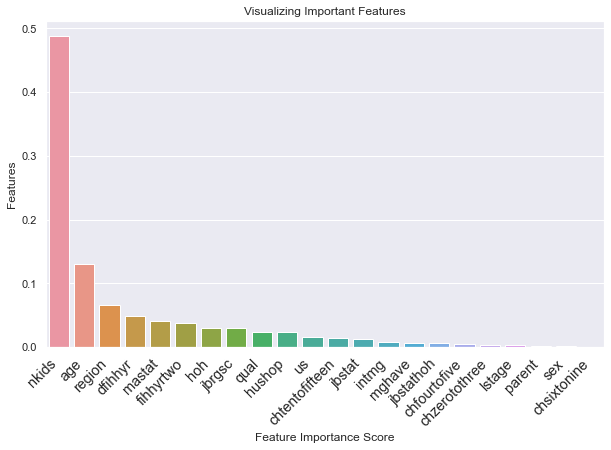

In [80]:
# visualize important featuers

# Creating a bar plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

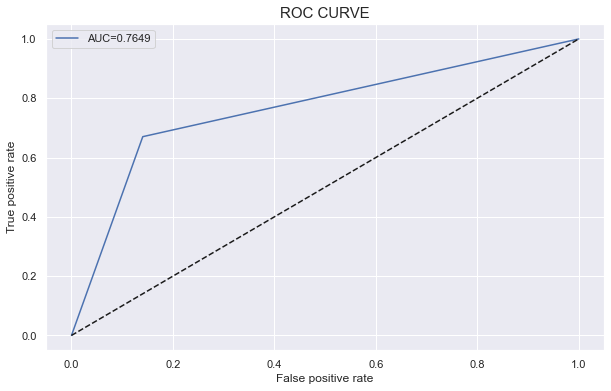

In [81]:
y_pred_proba = DecisionTree.predict_proba(x_test)[:, 1]

data_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']),
                                   pd.DataFrame(y_pred_proba, columns=['y_predicted'])],
                                  axis=1)

fpr, tpr, thresholds = roc_curve(data_actual_predicted['y_actual'], data_actual_predicted['y_predicted'])
auc = roc_auc_score(data_actual_predicted['y_actual'], data_actual_predicted['y_predicted'])

plt.plot(fpr, tpr, label='AUC=%0.4f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC CURVE', size=15)
plt.legend()
plt.show()

# Modelling Approach B: Tree-Based Model using Standard Method:

# Random Forest: Standard Method

In [82]:
# create the classifier
classifier = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [83]:
# predictin on the test set
y_pred = classifier.predict(x_test)

In [84]:
# Calculate Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.906801007556675


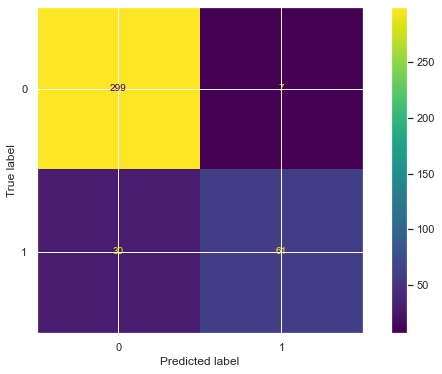

In [85]:
 #Computing values for confusion matrix
rfc_cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

# Creating a display of confusion matrix
rfc_disp = ConfusionMatrixDisplay(confusion_matrix=rfc_cm, 
                                  display_labels=classifier.classes_)

# Plotting a confusion matrix
rfc_disp.plot(values_format='')

# Displaying a plot
plt.show()

# Classification Report

In [86]:
from sklearn.metrics import classification_report

In [87]:
# Create classification report for random forest model
target_names = ['Predicted as small household', 'Predicted as big household']
print(classification_report(y_test, y_pred, target_names=target_names))

                              precision    recall  f1-score   support

Predicted as small household       0.91      0.98      0.94       306
  Predicted as big household       0.90      0.67      0.77        91

                    accuracy                           0.91       397
                   macro avg       0.90      0.82      0.85       397
                weighted avg       0.91      0.91      0.90       397



# Feature importance 

In [88]:
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(x.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
6,nkids,0.184730
1,age,0.127950
5,lstage,0.093016
7,parent,0.068106
11,chtentofifteen,0.049625
2,region,0.047848
21,dfihhyr,0.045987
17,fihhyrtwo,0.044134
12,qual,0.037063
3,mastat,0.036086


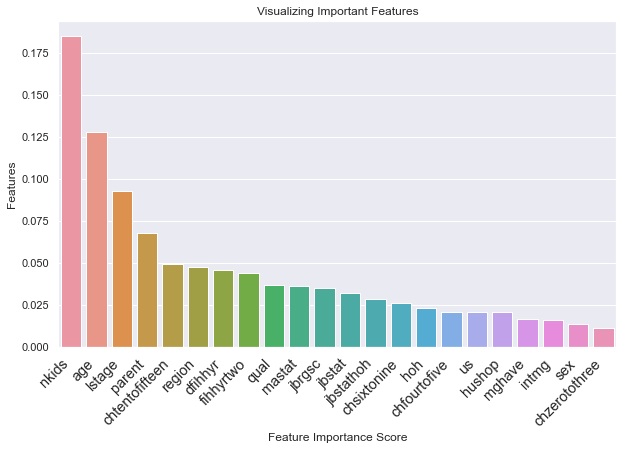

In [89]:
# visualize important featuers

# Creating a bar plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

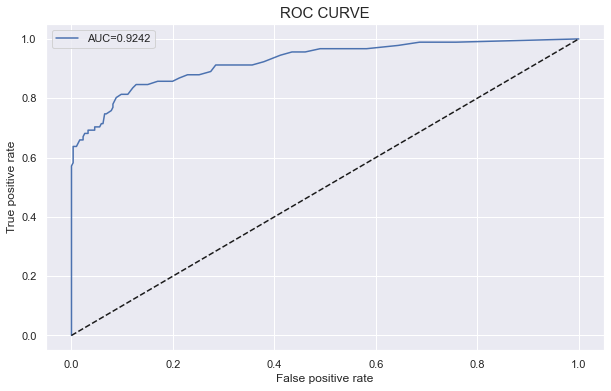

In [90]:
y_pred_proba = classifier.predict_proba(x_test)[:, 1]

data_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']),
                                   pd.DataFrame(y_pred_proba, columns=['y_predicted'])],
                                  axis=1)

fpr, tpr, thresholds = roc_curve(data_actual_predicted['y_actual'], data_actual_predicted['y_predicted'])
auc = roc_auc_score(data_actual_predicted['y_actual'], data_actual_predicted['y_predicted'])

plt.plot(fpr, tpr, label='AUC=%0.4f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC CURVE', size=15)
plt.legend()
plt.show()

# Modelling Approach C: Tree-Based Model using GridSearchCV Method

This approach covers implementation of Decision Tree and Random Forest

# Decision Tree: GridSearchCV

In [91]:
#importing package GridSearchCV
from sklearn.model_selection import GridSearchCV

In [92]:
dtree=DecisionTreeClassifier(class_weight='balanced')
param_grid={
    'max_depth':[3,4,5,6,7,8],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2,3,4],
    'random_state':[0,42]

}
grid_search=GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [93]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=0, max_depth=7, min_samples_leaf=3, min_samples_split=2, class_weight='balanced')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=3,
                       random_state=0)

In [94]:
from sklearn.metrics import accuracy_score
y_pred=dtree.predict(x_test)
print("Accuracy Score:", round(accuracy_score(y_test, y_pred)*100,2),"%")

Accuracy Score: 87.91 %


In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score, log_loss
print('F_1 Score:',(f1_score(y_test, y_pred, average='weighted')))
print('Precision Score:', (precision_score(y_test, y_pred, average='weighted')))
print('Recall Score:', (recall_score(y_test, y_pred, average='weighted')))
print('Jaccard Score:', (jaccard_score(y_test, y_pred, average='weighted')))
print('Log Loss:',(log_loss(y_test, y_pred)))

F_1 Score: 0.8786184111564201
Precision Score: 0.8782002109061796
Recall Score: 0.8790931989924433
Jaccard Score: 0.7917118089919907
Log Loss: 4.176019288908331


Text(0.5, 1.0, 'Accuracy Score for Decison Tree:0.8790931989924433')

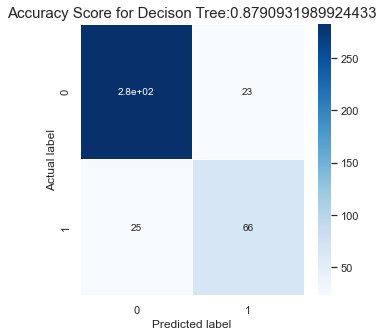

In [96]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidths=.5, annot=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Accuracy Score for Decison Tree:{0}'. format(dtree.score(x_test, y_test))
plt.title(all_sample_title, size=15)

# Feature Importance of the Decision Tree

In [97]:
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(x.columns), "importance": dtree.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
6,nkids,0.569373
1,age,0.225604
3,mastat,0.042670
21,dfihhyr,0.034350
15,hoh,0.032707
11,chtentofifteen,0.023422
5,lstage,0.013310
2,region,0.012450
13,jbstat,0.010245
4,hushop,0.006045


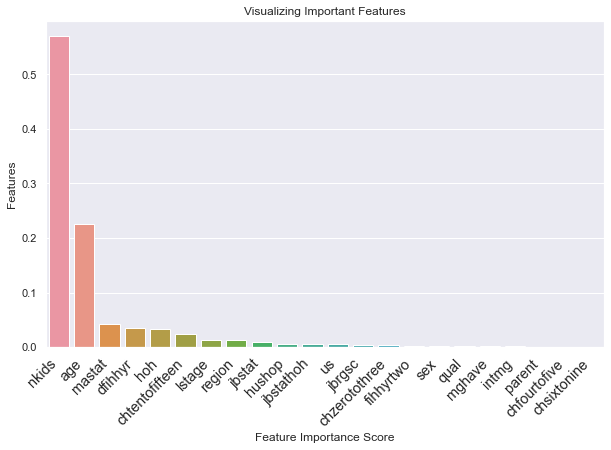

In [98]:
# visualize important featurers

# Creating a bar plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

# The Roc Curve of the Decision Tree

In [99]:
from sklearn.metrics import  roc_auc_score, roc_curve

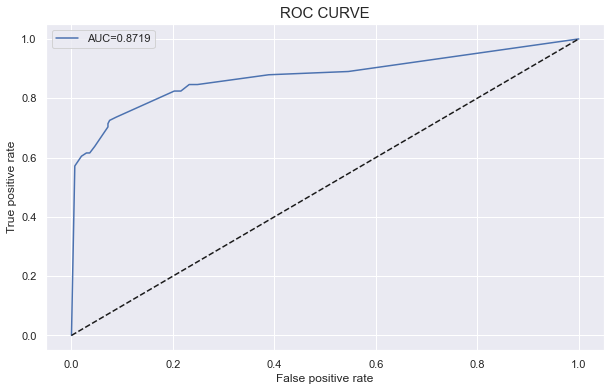

In [100]:
y_pred_proba = dtree.predict_proba(x_test)[:, 1]

data_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']),
                                   pd.DataFrame(y_pred_proba, columns=['y_predicted'])],
                                  axis=1)

fpr, tpr, thresholds = roc_curve(data_actual_predicted['y_actual'], data_actual_predicted['y_predicted'])
auc = roc_auc_score(data_actual_predicted['y_actual'], data_actual_predicted['y_predicted'])

plt.plot(fpr, tpr, label='AUC=%0.4f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC CURVE', size=15)
plt.legend()
plt.show()

# Random Forest: GridSearchCV

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(class_weight='balanced')
param_grid={
    'n_estimators':[100,200],
    'max_depth':[None, 5, 10],
    'max_features':['sqrt', 'log2', None],
    'random_state':[0, 42]
}
grid_search=GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 0}


In [102]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42, max_depth=10, max_features='sqrt', n_estimators=200)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=200,
                       random_state=42)

In [103]:
y_pred=rfc.predict(x_test)
print("Accuracy Score:", round(accuracy_score(y_test, y_pred)*100,2),"%")

Accuracy Score: 90.93 %


In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score, log_loss
print('F_1 Score:',(f1_score(y_test, y_pred, average='weighted')))
print('Precision Score:', (precision_score(y_test, y_pred, average='weighted')))
print('Recall Score:', (recall_score(y_test, y_pred, average='weighted')))
print('Jaccard Score:', (jaccard_score(y_test, y_pred, average='weighted')))
print('Log Loss:',(log_loss(y_test, y_pred)))

F_1 Score: 0.9041437482816851
Precision Score: 0.9094019255679467
Recall Score: 0.9093198992443325
Jaccard Score: 0.8323453144533931
Log Loss: 3.131991808063894


Text(0.5, 1.0, 'Accuracy Score for Random Forest:0.9093198992443325')

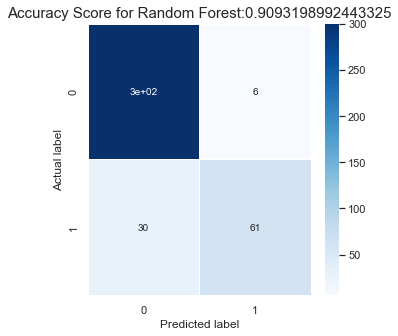

In [105]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidths=.5, annot=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Accuracy Score for Random Forest:{0}'. format(rfc.score(x_test, y_test))
plt.title(all_sample_title, size=15)

# Feature Importance of the Random Forest

In [106]:
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(x.columns), "importance": rfc.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
6,nkids,0.226237
1,age,0.118262
5,lstage,0.109315
7,parent,0.069836
11,chtentofifteen,0.052678
3,mastat,0.037721
2,region,0.037391
17,fihhyrtwo,0.036045
21,dfihhyr,0.034872
10,chsixtonine,0.033056


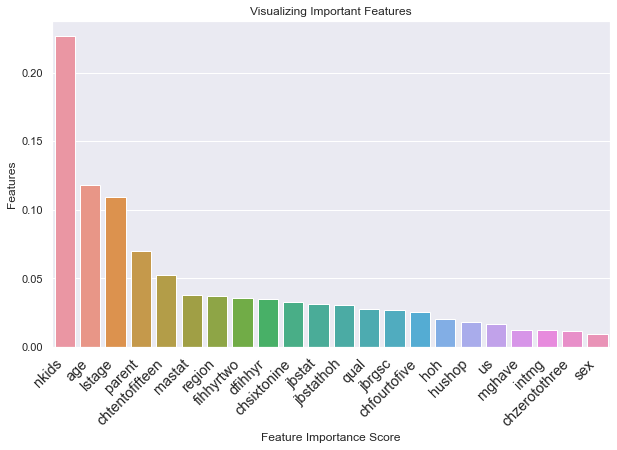

In [107]:
# visualize important featuers

# Creating a bar plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

# The Roc Curve of the Random Forest

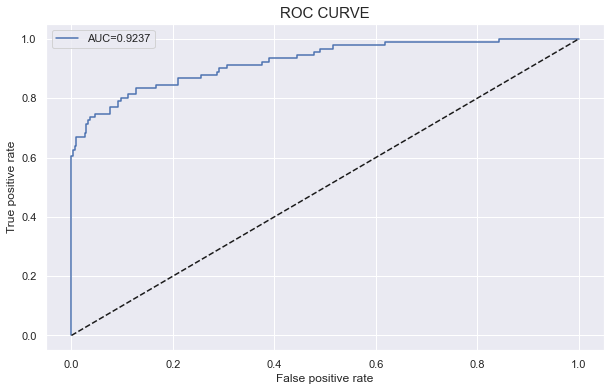

In [108]:
y_pred_proba = rfc.predict_proba(x_test)[:, 1]

data_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']),
                                   pd.DataFrame(y_pred_proba, columns=['y_predicted'])],
                                  axis=1)

fpr, tpr, thresholds = roc_curve(data_actual_predicted['y_actual'], data_actual_predicted['y_predicted'])
auc = roc_auc_score(data_actual_predicted['y_actual'], data_actual_predicted['y_predicted'])

plt.plot(fpr, tpr, label='AUC=%0.4f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC CURVE', size=15)
plt.legend()
plt.show()

# Summary of model results:

# Naive Bayes Classifier:

The naive bayes model achieved precision of 80% , recall of 80%,   f1_score of 80% (all weighted averages), accuracy of  80% on the test set and AUC of 88% 

# Tree_based Model: Standard Method:

The decision tree achieved precision of  83% , recall of  82%, f1_score of 82% (all weighted averages),  and an accuracy of  82% on the test set  AUC of 76%

The random forest has achieved  precision of  91%, f1_score=90%, recall of 91% (all weighted averages), accuracy of  91% on the test set, and an AUC of 92%

# Tree-Based Model: GridSearchCV Method:

The decision tree achieved  precision of 88%, recall of 88%, f1_score of 87% (all weighted averages) accuracy of 87% on the test set and an AUC of 87%

The random forest has achieved precision of 91%, f1_score=90%, recall of 91% (all weighted averages) accuracy of 91% on the test set and an AUC of 92%

# Feature importance explained

The are five machine learning models that have been in this project, the naive bayes classifier, decision tree classifier the standard form, random forest the standard form, decision tree GridSearchCV and random forest GridSearchCV. The variable nkids in all machine learning models is the most import in predicting the household size in the United Kingdom. The more the nkids in a household the bigger the family size and vise versa. One of the variables that is playing important role is the machine learning models used besides the naive bayes classifier is the age variable. This means that the greater the age of the people in this survey, the greater the chances of them having kids, and on the other hand increasing the sizes of the households. 

# The best model to forecast household size in the UK

From the results we obtained above, we can see that the random forest (standard method) and random forest (GridSearch Method) produce the best results. Infact these two methods produced same results and one of the two methods is the best forcasting household size in the UK. The accuracies of these methods are 91% and AUCs are 92% which is quite remarkable. The other methods namely naive bayes classifier, the decision tree classifier (standard method), decision tree classifier (GridSearch Method) produced lower accuracies and AUCs respectively.